# Data Cleaning and Pre processing

In [122]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [123]:
# beneficiary data
bene_train = pd.read_csv('../data/Train_Beneficiarydata-1542865627584.csv')
bene_test= pd.read_csv('../data/Test_Beneficiarydata-1542969243754.csv')

# inpatient data
inp_test = pd.read_csv('../data/Test_Inpatientdata-1542969243754.csv')
inp_train = pd.read_csv('../data/Train_Inpatientdata-1542865627584.csv')

# outpatient data
outp_test= pd.read_csv('../data/Test_Outpatientdata-1542969243754.csv')
outp_train = pd.read_csv('../data/Train_Outpatientdata-1542865627584.csv')

#label data
label_train = pd.read_csv('../data/Train-1542865627584.csv')
label_test = pd.read_csv('../data/Test-1542969243754.csv')

FileNotFoundError: [Errno 2] No such file or directory: '../data/Train_Beneficiarydata-1542865627584.csv'

### beneficiary data

In [3]:
bene_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138556 entries, 0 to 138555
Data columns (total 25 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   BeneID                           138556 non-null  object
 1   DOB                              138556 non-null  object
 2   DOD                              1421 non-null    object
 3   Gender                           138556 non-null  int64 
 4   Race                             138556 non-null  int64 
 5   RenalDiseaseIndicator            138556 non-null  object
 6   State                            138556 non-null  int64 
 7   County                           138556 non-null  int64 
 8   NoOfMonths_PartACov              138556 non-null  int64 
 9   NoOfMonths_PartBCov              138556 non-null  int64 
 10  ChronicCond_Alzheimer            138556 non-null  int64 
 11  ChronicCond_Heartfailure         138556 non-null  int64 
 12  ChronicCond_Kidn

In [4]:
bene_train.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt
0,BENE11001,1943-01-01,NaN,1,1,0,39,230,12,12,1,2,1,2,2,1,1,1,2,1,1,36000,3204,60,70
1,BENE11002,1936-09-01,NaN,2,1,0,39,280,12,12,2,2,2,2,2,2,2,2,2,2,2,0,0,30,50
2,BENE11003,1936-08-01,NaN,1,1,0,52,590,12,12,1,2,2,2,2,2,2,1,2,2,2,0,0,90,40
3,BENE11004,1922-07-01,NaN,1,1,0,39,270,12,12,1,1,2,2,2,2,1,1,1,1,2,0,0,1810,760
4,BENE11005,1935-09-01,NaN,1,1,0,24,680,12,12,2,2,2,2,1,2,1,2,2,2,2,0,0,1790,1200


In [5]:
bene_train.shape, bene_test.shape

((138556, 25), (63968, 25))

In [6]:
bene_train.columns


Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt'],
      dtype='object')

In [7]:
bene_train['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
Y     19578
Name: count, dtype: int64

In [8]:
# this value indicates whether the beneficiary has renal disease
bene_train['RenalDiseaseIndicator'] = bene_train['RenalDiseaseIndicator'].replace('Y',1).astype(int)
bene_train['RenalDiseaseIndicator'].value_counts()

RenalDiseaseIndicator
0    118978
1     19578
Name: count, dtype: int64

In [9]:
# Data Reduction: Delete DOD DOB and change it into new feature 'Age' and 'Alive'
for col in ['DOB','DOD']:  
    bene_train[col] = pd.to_datetime(bene_train[col])
    

In [10]:
bene_train['BirthYear'] = bene_train['DOB'].dt.year
# Greatest Date of Death in the TRAIN set for beneficiaries
max_bene_DOD = max(bene_train['DOD'].unique()[1:])
max_bene_DOD

Timestamp('2009-12-01 00:00:00')

In [11]:
# For all NAN DODs filling the greatest Date of Death
bene_train['DOD'].fillna(value=max_bene_DOD, inplace=True)

# Calculating Age from DOD and DOB
bene_train['Age'] = round(((bene_train['DOD'] - bene_train['DOB']).dt.days)/365,0)


In [12]:
bene_train['Age'].describe()

count    138556.000000
mean         73.622831
std          12.733335
min          26.000000
25%          68.000000
50%          74.000000
75%          82.000000
max         101.000000
Name: Age, dtype: float64

In [13]:
bene_train['Alive'] = bene_train['DOD'].apply(lambda x: 1 if x != x else 0)
bene_train['Alive'].value_counts()

Alive
0    138556
Name: count, dtype: int64

In [14]:
# NoOfMonths_PartACOV and NoOfMonths_PartBCOV¶
bene_train.groupby('NoOfMonths_PartACov').count()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive
NoOfMonths_PartACov,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
1,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
2,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
3,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
4,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
5,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
6,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38,38
7,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
8,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26


In [15]:
# NoOfMonths_PartBCOV¶
bene_train.groupby('NoOfMonths_PartBCov').count()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive
NoOfMonths_PartBCov,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675,675
1,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
2,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
3,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
4,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35,35
5,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50,50
6,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282,282
7,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63,63
8,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71


In [16]:
bene_train.columns

Index(['BeneID', 'DOB', 'DOD', 'Gender', 'Race', 'RenalDiseaseIndicator',
       'State', 'County', 'NoOfMonths_PartACov', 'NoOfMonths_PartBCov',
       'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
       'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
       'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
       'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
       'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
       'ChronicCond_stroke', 'IPAnnualReimbursementAmt',
       'IPAnnualDeductibleAmt', 'OPAnnualReimbursementAmt',
       'OPAnnualDeductibleAmt', 'BirthYear', 'Age', 'Alive'],
      dtype='object')

In [17]:
diseases = ['ChronicCond_Alzheimer','ChronicCond_Heartfailure',
           'ChronicCond_KidneyDisease','ChronicCond_Cancer','ChronicCond_ObstrPulmonary',
          'ChronicCond_Depression','ChronicCond_Diabetes','ChronicCond_IschemicHeart','ChronicCond_Osteoporasis',
           'ChronicCond_rheumatoidarthritis','ChronicCond_stroke']

In [18]:
# converting diseases columns to binary column as each disease say 1: Yes, 2: No

for disease in diseases:
    bene_train[disease] = bene_train[disease].replace({1:'Yes', 2: 'No'})

In [19]:
bene_train.dtypes

BeneID                                     object
DOB                                datetime64[ns]
DOD                                datetime64[ns]
Gender                                      int64
Race                                        int64
RenalDiseaseIndicator                       int64
State                                       int64
County                                      int64
NoOfMonths_PartACov                         int64
NoOfMonths_PartBCov                         int64
ChronicCond_Alzheimer                      object
ChronicCond_Heartfailure                   object
ChronicCond_KidneyDisease                  object
ChronicCond_Cancer                         object
ChronicCond_ObstrPulmonary                 object
ChronicCond_Depression                     object
ChronicCond_Diabetes                       object
ChronicCond_IschemicHeart                  object
ChronicCond_Osteoporasis                   object
ChronicCond_rheumatoidarthritis            object


In [20]:

for i in range(bene_train.shape[0]):#
    chronicDCnt = 0
    for disease in diseases:
        if bene_train.loc[i,disease] == 'Yes':
                chronicDCnt+=1
        else:
                continue
    bene_train.loc[i,'ChronicDisease_Count'] = chronicDCnt

In [21]:
bene_train.head(2)

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count
0,BENE11001,1943-01-01,2009-12-01,1,1,0,39,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
1,BENE11002,1936-09-01,2009-12-01,2,1,0,39,280,12,12,No,No,No,No,No,No,No,No,No,No,No,0,0,30,50,1936,73.0,0,0.0


In [22]:
bene_train.shape

(138556, 29)

In [23]:
bene_train['Gender'].value_counts()

Gender
2    79106
1    59450
Name: count, dtype: int64

In [24]:
# Replacing gender with category
bene_train['Gender'] = bene_train['Gender'].replace({1:'Male', 2:'Female'})

In [25]:
# Replacing race with actual category based on common CMS (Centers for Medicare & Medicaid Services)
bene_train['Race'] = bene_train['Race'].replace({1:'White', 2:'Black or African American',3:'Other', 5:'Hispanic'})

In [26]:
bene_train['Race'].value_counts()

Race
White                        117057
Black or African American     13538
Other                          5059
Hispanic                       2902
Name: count, dtype: int64

In [27]:
# State mapping

state_mapping = {
    1: 'Alabama', 2: 'Alaska', 3: 'Arizona', 4: 'Arkansas', 5: 'California', 
    6: 'Colorado', 7: 'Connecticut', 8: 'Delaware', 9: 'District of Columbia', 
    10: 'Florida', 11: 'Georgia', 12: 'Hawaii', 13: 'Idaho', 14: 'Illinois', 
    15: 'Indiana', 16: 'Iowa', 17: 'Kansas', 18: 'Kentucky', 19: 'Louisiana', 
    20: 'Maine', 21: 'Maryland', 22: 'Massachusetts', 23: 'Michigan', 
    24: 'Minnesota', 25: 'Mississippi', 26: 'Missouri', 27: 'Montana', 
    28: 'Nebraska', 29: 'Nevada', 30: 'New Hampshire', 31: 'New Jersey', 
    32: 'New Mexico', 33: 'New York', 34: 'North Carolina', 35: 'North Dakota', 
    36: 'Ohio', 37: 'Oklahoma', 38: 'Oregon', 39: 'Pennsylvania', 
    40: 'Rhode Island', 41: 'South Carolina', 42: 'South Dakota', 
    43: 'Tennessee', 44: 'Texas', 45: 'Utah', 46: 'Vermont', 47: 'Virginia', 
    48: 'Washington', 49: 'West Virginia', 50: 'Wisconsin', 51: 'Wyoming',
    52: 'American Samoa', 53: 'Guam', 54: 'Puerto Rico'
}
 
# Replace integer codes with state names
bene_train['State'] = bene_train['State'].replace(state_mapping)

In [28]:
bene_train['State'].value_counts()

State
California              12052
Florida                  9771
Utah                     8780
New York                 8443
Pennsylvania             6055
Illinois                 5923
Ohio                     5366
Michigan                 5293
North Carolina           4629
New Jersey               4124
Georgia                  3892
West Virginia            3623
Texas                    3390
Massachusetts            3306
Indiana                  3272
Missouri                 3108
Wisconsin                2793
American Samoa           2662
Alabama                  2615
Maryland                 2570
South Dakota             2524
Kentucky                 2519
Arizona                  2395
Minnesota                2165
Louisiana                1998
Oklahoma                 1926
Arkansas                 1817
Colorado                 1807
Iowa                     1746
Mississippi              1622
Connecticut              1602
Oregon                   1468
Kansas                   1339
Puer

### Inpatient data & Outpatient Data

In [29]:
outp_train.shape, inp_train.shape

((517737, 27), (40474, 30))

In [30]:
outp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,56409
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,79380
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,71947


In [31]:
inp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,NaN,2009-08-13,78321,1068.0,2009-08-30,975,042,3051,34400,5856,42732,486,5119,29620,20300,NaN,3893.0,NaN,NaN,NaN,NaN,NaN


In [32]:
inp_train['ClaimStartDt'].min()

'2008-11-27'

In [33]:
for col in ['ClaimEndDt','ClaimStartDt', 'DischargeDt', 'AdmissionDt']:  
    inp_train[col] = pd.to_datetime(inp_train[col])

for col in ['ClaimEndDt','ClaimStartDt']:  
    outp_train[col] = pd.to_datetime(outp_train[col])

In [34]:
inp_train['ClaimPeriod'] =  round(((inp_train.ClaimEndDt - inp_train.ClaimStartDt).dt.days),0)
outp_train['ClaimPeriod'] =  round(((outp_train.ClaimEndDt - outp_train.ClaimStartDt).dt.days),0)

In [35]:
inp_train['TimeInHptal'] =  round(((inp_train.DischargeDt - inp_train.AdmissionDt).dt.days),0)

In [36]:
# dropping date columns as no longer needed
inp_train.drop(['DischargeDt','AdmissionDt'],axis=1,inplace=True)

In [35]:
# inp_train['ClmDiagnosisCode_2'].value_counts()

In [37]:
ClmProcedureCode = ['ClmProcedureCode_1', 'ClmProcedureCode_2', 'ClmProcedureCode_3',
        'ClmProcedureCode_4', 'ClmProcedureCode_5', 'ClmProcedureCode_6',]

ClmDiagnosisCode = ['ClmDiagnosisCode_1',
       'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4',
       'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7',
       'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10']

In [38]:
for code in ClmDiagnosisCode:
    inp_train.fillna('-1',inplace=True)
    outp_train.fillna('-1',inplace=True)

def CountingIndex(df,codeList,indexName):
    
    for i in range(df.shape[0]):#
        DiagnosisCnt = 0
        for code in codeList:
            if df.loc[i,code]== '-1' :
                continue  
            else:
                 DiagnosisCnt+=1
        df.loc[i,indexName] = DiagnosisCnt

In [39]:
CountingIndex(inp_train,ClmDiagnosisCode,'Diagnosis Count')
CountingIndex(outp_train,ClmDiagnosisCode,'Diagnosis Count')

In [40]:
CountingIndex(inp_train,ClmProcedureCode,'Procedures Count')
CountingIndex(outp_train,ClmProcedureCode,'Procedures Count')

In [41]:
inp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,-1,-1,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,-1,-1,-1,-1,-1,-1,-1,6,6,9.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,-1,6186,1068.0,750,6186,2948,56400,-1,-1,-1,-1,-1,-1,-1,7092.0,-1,-1,-1,-1,-1,2,2,3.0,1.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,-1,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,3,6.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,-1,331.0,-1,-1,-1,-1,-1,8,8,9.0,1.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,-1,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,-1,3893.0,-1,-1,-1,-1,-1,17,17,9.0,1.0


We create a new feature: SameApplicant, it is 1 if the attending physician and the operating physician in this patient data are the same person and 0 if not

In [42]:
def isSamePhysician(df):
    for i in range(0,df.shape[0]):

        if  df.loc[i,['AttendingPhysician']][0] == df.loc[i,['OperatingPhysician']][0]:
            df.loc[i,'SamePhysician'] = 1
        else:
            df.loc[i,'SamePhysician'] = 0

In [43]:
inp_train.OtherPhysician.fillna(0,inplace=True)
outp_train.OtherPhysician.fillna(0,inplace=True)

In [43]:
# outp_train.isna().sum()

In [44]:
isSamePhysician(inp_train)
isSamePhysician(outp_train)

In [45]:
inp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,-1,-1,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,-1,-1,-1,-1,-1,-1,-1,6,6,9.0,0.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,-1,6186,1068.0,750,6186,2948,56400,-1,-1,-1,-1,-1,-1,-1,7092.0,-1,-1,-1,-1,-1,2,2,3.0,1.0,1.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,-1,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,3,6.0,0.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,-1,331.0,-1,-1,-1,-1,-1,8,8,9.0,1.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,-1,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,-1,3893.0,-1,-1,-1,-1,-1,17,17,9.0,1.0,0.0


In [46]:
inp_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClaimPeriod',
       'TimeInHptal', 'Diagnosis Count', 'Procedures Count', 'SamePhysician'],
      dtype='object')

In [124]:
bene_train.head()

,BeneID,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count
0,BENE11001,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
1,BENE11002,1936-09-01,2009-12-01,Female,White,0,Pennsylvania,280,12,12,No,No,No,No,No,No,No,No,No,No,No,0,0,30,50,1936,73.0,0,0.0
2,BENE11003,1936-08-01,2009-12-01,Male,White,0,American Samoa,590,12,12,Yes,No,No,No,No,No,No,Yes,No,No,No,0,0,90,40,1936,73.0,0,2.0
3,BENE11004,1922-07-01,2009-12-01,Male,White,0,Pennsylvania,270,12,12,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,0,0,1810,760,1922,87.0,0,6.0
4,BENE11005,1935-09-01,2009-12-01,Male,White,0,Minnesota,680,12,12,No,No,No,No,Yes,No,Yes,No,No,No,No,0,0,1790,1200,1935,74.0,0,2.0


In [125]:
# bene_train.to_csv('../data/interim/clean2/bene_train.csv')
# bene_train.shape

(138556, 29)

In [48]:
# inp_train.to_csv('../data/interim/clean1/inpatient_train.csv')
# inp_train.shape

(40474, 33)

In [49]:
# outp_train.to_csv('../data/interim/clean1/outpatient_train.csv')
# outp_train.shape

(517737, 31)

In [47]:
inp_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
       'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClaimPeriod',
       'TimeInHptal', 'Diagnosis Count', 'Procedures Count', 'SamePhysician'],
      dtype='object')

In [48]:
inp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,-1,-1,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,-1,-1,-1,-1,-1,-1,-1,6,6,9.0,0.0,0.0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,-1,6186,1068.0,750,6186,2948,56400,-1,-1,-1,-1,-1,-1,-1,7092.0,-1,-1,-1,-1,-1,2,2,3.0,1.0,1.0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,-1,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,3,6.0,0.0,0.0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,-1,331.0,-1,-1,-1,-1,-1,8,8,9.0,1.0,0.0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,-1,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,-1,3893.0,-1,-1,-1,-1,-1,17,17,9.0,1.0,0.0


In [49]:
inp_imp_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimPeriod',
       'TimeInHptal', 'Diagnosis Count', 'Procedures Count', 'SamePhysician']

In [128]:
# inp_train[inp_imp_cols].to_csv('../data/interim/clean2/inpatient_train.csv')

In [50]:
outp_train.columns

Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode', 'ClaimPeriod', 'Diagnosis Count',
       'Procedures Count', 'SamePhysician'],
      dtype='object')

In [51]:
outp_imp_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimPeriod', 'Diagnosis Count',
       'Procedures Count', 'SamePhysician']

In [129]:
# outp_train[outp_imp_cols].to_csv('../data/interim/clean2/outpatient_train.csv')

### Merging all the files

In [52]:
label_train.head()

,Provider,PotentialFraud
0,PRV51001,No
1,PRV51003,Yes
2,PRV51004,No
3,PRV51005,Yes
4,PRV51007,No


In [57]:
label_train.shape

(5410, 2)

In [53]:
label_train['PotentialFraud'].replace('No',0,inplace=True)
label_train['PotentialFraud'].replace('Yes',1,inplace=True)

fraud = label_train[label_train['PotentialFraud']==1]
fraud.shape[0]

506

In [54]:
inp_train['OPD_Flag'] = 0

In [55]:
inp_imp_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimPeriod',
       'TimeInHptal', 'Diagnosis Count', 'Procedures Count', 'SamePhysician', 'OPD_Flag']

In [56]:
inp_imp_cols

['BeneID',
 'ClaimID',
 'Provider',
 'InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'ClaimPeriod',
 'TimeInHptal',
 'Diagnosis Count',
 'Procedures Count',
 'SamePhysician',
 'OPD_Flag']

In [57]:
outp_train['TimeInHptal'] = 0
outp_train['OPD_Flag'] = 1

In [58]:
outp_imp_cols = ['BeneID', 'ClaimID', 'Provider',
       'InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimPeriod', 'TimeInHptal','Diagnosis Count',
       'Procedures Count', 'SamePhysician', 'OPD_Flag']

In [59]:
outp_imp_cols

['BeneID',
 'ClaimID',
 'Provider',
 'InscClaimAmtReimbursed',
 'DeductibleAmtPaid',
 'ClaimPeriod',
 'TimeInHptal',
 'Diagnosis Count',
 'Procedures Count',
 'SamePhysician',
 'OPD_Flag']

In [60]:
inp_train.columns, outp_train.columns

(Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
        'OtherPhysician', 'ClmAdmitDiagnosisCode', 'DeductibleAmtPaid',
        'DiagnosisGroupCode', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
        'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
        'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
        'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
        'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
        'ClmProcedureCode_5', 'ClmProcedureCode_6', 'ClaimPeriod',
        'TimeInHptal', 'Diagnosis Count', 'Procedures Count', 'SamePhysician',
        'OPD_Flag'],
       dtype='object'),
 Index(['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
        'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
        'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2'

In [61]:
outp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,DeductibleAmtPaid,ClmAdmitDiagnosisCode,ClaimPeriod,Diagnosis Count,Procedures Count,SamePhysician,TimeInHptal,OPD_Flag
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,-1,-1,78943,V5866,V1272,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,56409,0,3.0,0.0,0.0,0,1
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,-1,-1,6115,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,79380,0,1.0,0.0,0.0,0,1
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,-1,-1,2723,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,1.0,0.0,0.0,0,1
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,-1,-1,71988,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,-1,0,1.0,0.0,0.0,0,1
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,-1,-1,82382,30000,72887,4280,7197,V4577,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,0,71947,0,6.0,0.0,0.0,0,1


In [62]:
inp_train.head()

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag
0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,-1,-1,7866,1068.0,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,-1,-1,-1,-1,-1,-1,-1,6,6,9.0,0.0,0.0,0
1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,-1,6186,1068.0,750,6186,2948,56400,-1,-1,-1,-1,-1,-1,-1,7092.0,-1,-1,-1,-1,-1,2,2,3.0,1.0,1.0,0
2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,-1,PHY324689,29590,1068.0,883,29623,30390,71690,34590,V1581,32723,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,3,3,6.0,0.0,0.0,0
3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,431,1068.0,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,-1,331.0,-1,-1,-1,-1,-1,8,8,9.0,1.0,0.0,0
4,BENE11014,CLM63689,2009-08-13,2009-08-30,PRV56614,10000,PHY379376,PHY398258,-1,78321,1068.0,975,042,3051,34400,5856,42732,486,5119,29620,20300,-1,3893.0,-1,-1,-1,-1,-1,17,17,9.0,1.0,0.0,0


In [63]:
inp_train.shape, outp_train.shape

((40474, 34), (517737, 33))

In [64]:
ip_op_train = pd.concat([inp_train[inp_imp_cols], outp_train[outp_imp_cols]])
ip_op_train.shape

(558211, 11)

In [65]:
ip_op_train.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag
0,BENE11001,CLM46614,PRV55912,26000,1068.0,6,6,9.0,0.0,0.0,0
1,BENE11001,CLM66048,PRV55907,5000,1068.0,2,2,3.0,1.0,1.0,0
2,BENE11001,CLM68358,PRV56046,5000,1068.0,3,3,6.0,0.0,0.0,0
3,BENE11011,CLM38412,PRV52405,5000,1068.0,8,8,9.0,1.0,0.0,0
4,BENE11014,CLM63689,PRV56614,10000,1068.0,17,17,9.0,1.0,0.0,0


In [114]:
# ip_op_train.to_clipboard()

In [118]:
# ip_op_train = pd.merge(left=inp_train[inp_imp_cols], right=outp_train[outp_imp_cols], 
#                 how='outer', left_on='BeneID', right_on='BeneID')
# ip_op_train.shape

In [66]:
ip_op_train.columns

Index(['BeneID', 'ClaimID', 'Provider', 'InscClaimAmtReimbursed',
       'DeductibleAmtPaid', 'ClaimPeriod', 'TimeInHptal', 'Diagnosis Count',
       'Procedures Count', 'SamePhysician', 'OPD_Flag'],
      dtype='object')

In [67]:
label_train.columns, label_train.shape

(Index(['Provider', 'PotentialFraud'], dtype='object'), (5410, 2))

In [68]:
ip_op_train = pd.merge(left=ip_op_train, right=label_train, left_on='Provider', right_on= 'Provider', how='inner')
ip_op_train.shape

(558211, 12)

In [69]:
ip_op_train['PotentialFraud'].value_counts()

PotentialFraud
0    345415
1    212796
Name: count, dtype: int64

In [70]:
# Joining the IP_OP dataset with the BENE data
train_df = pd.merge(left=ip_op_train, right=bene_train, left_on='BeneID', right_on='BeneID',how='inner')
train_df.shape

(558211, 40)

In [73]:
train_df.to_clipboard()

In [74]:
train_df.to_csv('../data/interim/training_data.csv')

In [75]:
train_df.isna().sum()

BeneID                             0
ClaimID                            0
Provider                           0
InscClaimAmtReimbursed             0
DeductibleAmtPaid                  0
ClaimPeriod                        0
TimeInHptal                        0
Diagnosis Count                    0
Procedures Count                   0
SamePhysician                      0
OPD_Flag                           0
PotentialFraud                     0
DOB                                0
DOD                                0
Gender                             0
Race                               0
RenalDiseaseIndicator              0
State                              0
County                             0
NoOfMonths_PartACov                0
NoOfMonths_PartBCov                0
ChronicCond_Alzheimer              0
ChronicCond_Heartfailure           0
ChronicCond_KidneyDisease          0
ChronicCond_Cancer                 0
ChronicCond_ObstrPulmonary         0
ChronicCond_Depression             0
C

In [76]:
train_df.head()

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,DeductibleAmtPaid,ClaimPeriod,TimeInHptal,Diagnosis Count,Procedures Count,SamePhysician,OPD_Flag,PotentialFraud,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,ChronicCond_Alzheimer,ChronicCond_Heartfailure,ChronicCond_KidneyDisease,ChronicCond_Cancer,ChronicCond_ObstrPulmonary,ChronicCond_Depression,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,BirthYear,Age,Alive,ChronicDisease_Count
0,BENE11001,CLM46614,PRV55912,26000,1068.0,6,6,9.0,0.0,0.0,0,1,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
1,BENE11001,CLM66048,PRV55907,5000,1068.0,2,2,3.0,1.0,1.0,0,0,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
2,BENE11001,CLM68358,PRV56046,5000,1068.0,3,3,6.0,0.0,0.0,0,0,1943-01-01,2009-12-01,Male,White,0,Pennsylvania,230,12,12,Yes,No,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,36000,3204,60,70,1943,67.0,0,7.0
3,BENE11011,CLM38412,PRV52405,5000,1068.0,8,8,9.0,1.0,0.0,0,0,1914-03-01,2009-12-01,Female,Black or African American,0,Alabama,360,12,12,No,Yes,Yes,No,No,Yes,Yes,No,No,Yes,Yes,5000,1068,250,320,1914,96.0,0,6.0
4,BENE11014,CLM63689,PRV56614,10000,1068.0,17,17,9.0,1.0,0.0,0,0,1938-04-01,2009-12-01,Female,White,1,Utah,780,12,12,No,Yes,Yes,No,Yes,Yes,No,Yes,No,No,No,21260,2136,120,100,1938,72.0,0,5.0


# EDA

In [89]:
import matplotlib.pyplot as plt

In [105]:
# Set plot style
sns.set_theme(style="whitegrid")
%matplotlib inline

In [103]:
sns.color_palette()

[(0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 (0.3333333333333333, 0.6588235294117647, 0.40784313725490196),
 (0.7686274509803922, 0.3058823529411765, 0.3215686274509804),
 (0.5058823529411764, 0.4470588235294118, 0.7019607843137254),
 (0.5764705882352941, 0.47058823529411764, 0.3764705882352941),
 (0.8549019607843137, 0.5450980392156862, 0.7647058823529411),
 (0.5490196078431373, 0.5490196078431373, 0.5490196078431373),
 (0.8, 0.7254901960784313, 0.4549019607843137),
 (0.39215686274509803, 0.7098039215686275, 0.803921568627451)]

In [84]:
os.chdir('D:\MPS ANALYTICS\Q3\ALY6110\Final Project\data\interim')

In [85]:
os.getcwd()

'D:\\MPS ANALYTICS\\Q3\\ALY6110\\Final Project\\data\\interim'

In [107]:
df = pd.read_csv('training_data.csv')

In [106]:
# Display the first few rows
print(df.head())

# Get the shape of the dataset
print(f"Dataset contains {df.shape[0]} rows and {df.shape[1]} columns.")

# Check data types and non-null counts
print(df.info())

   Unnamed: 0     BeneID   ClaimID  Provider  InscClaimAmtReimbursed  \
0           0  BENE11001  CLM46614  PRV55912                   26000   
1           1  BENE11001  CLM66048  PRV55907                    5000   
2           2  BENE11001  CLM68358  PRV56046                    5000   
3           3  BENE11011  CLM38412  PRV52405                    5000   
4           4  BENE11014  CLM63689  PRV56614                   10000   

   DeductibleAmtPaid  ClaimPeriod  TimeInHptal  Diagnosis Count  \
0             1068.0            6            6              9.0   
1             1068.0            2            2              3.0   
2             1068.0            3            3              6.0   
3             1068.0            8            8              9.0   
4             1068.0           17           17              9.0   

   Procedures Count  SamePhysician  OPD_Flag PotentialFraud         DOB  \
0               0.0            0.0         0            NaN  1943-01-01   
1             

## Target Variable Analysis

### a. Distribution of PotentialFraud

In [111]:
# Calculate percentage distribution
fraud_percentages = df['PotentialFraud'].value_counts(normalize=True) * 100
fraud_percentages

PotentialFraud
0    61.878931
1    38.121069
Name: proportion, dtype: float64

Text(0, 0.5, 'Percentage (%)')

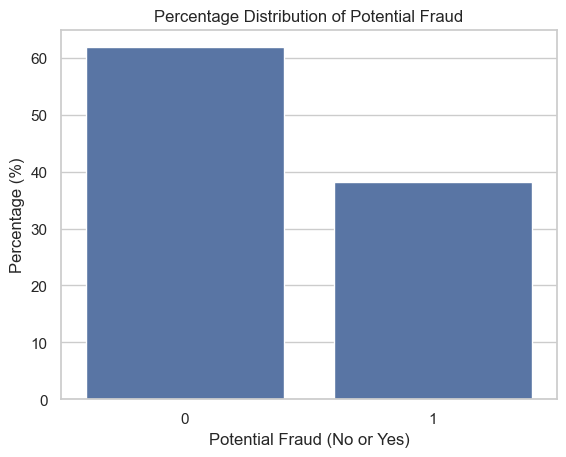

In [110]:
# Plotting the percentages
sns.barplot(x=fraud_percentages.index, y=fraud_percentages.values)
plt.title('Percentage Distribution of Potential Fraud')
plt.xlabel('Potential Fraud (No or Yes)')
plt.ylabel('Percentage (%)')

## Univariate Analysis

### a. Numerical Features

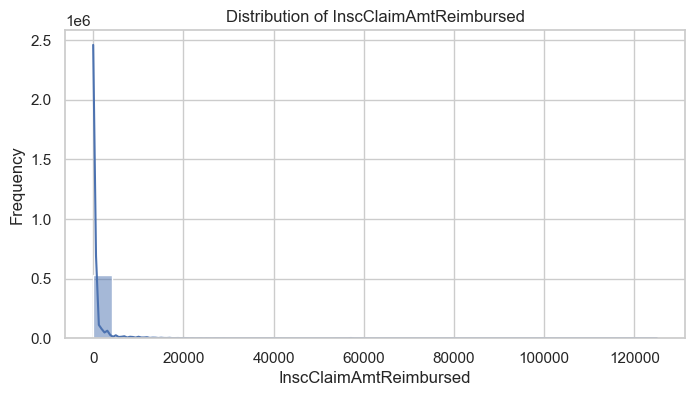

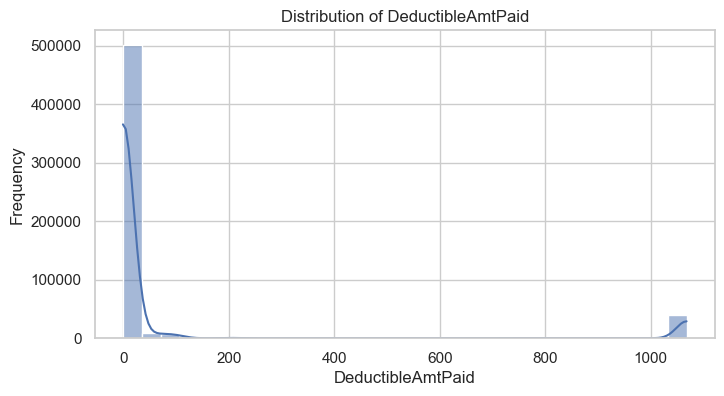

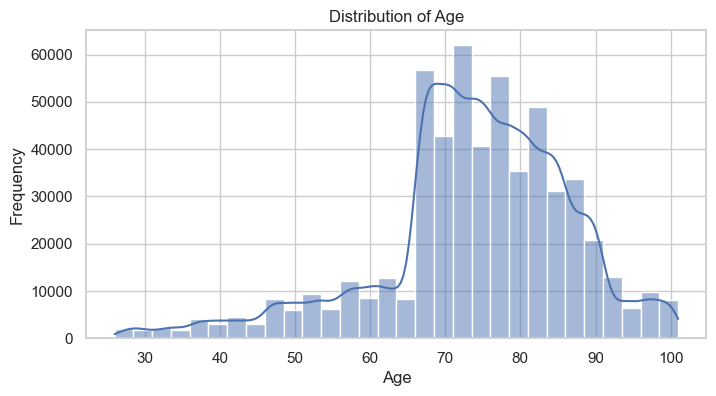

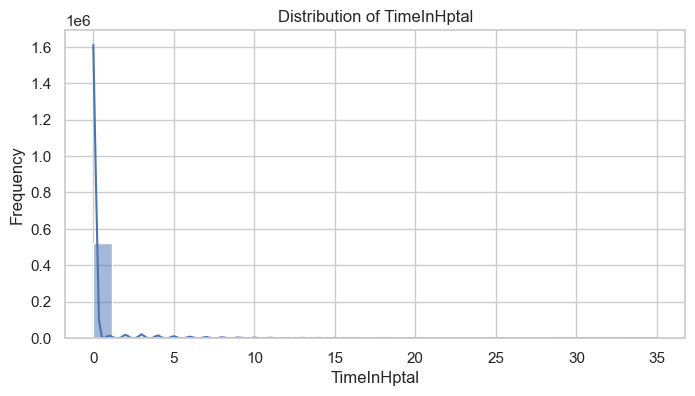

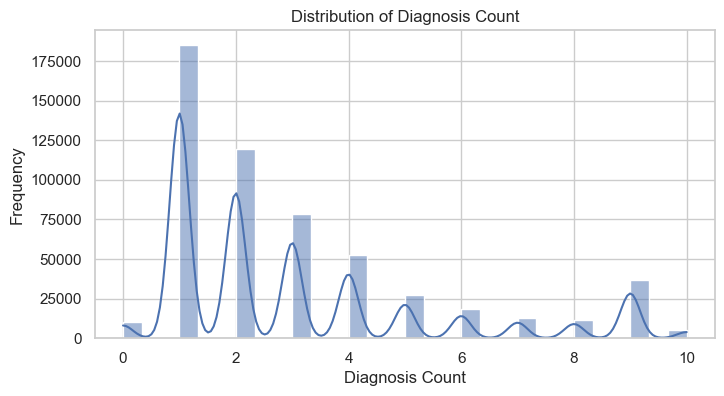

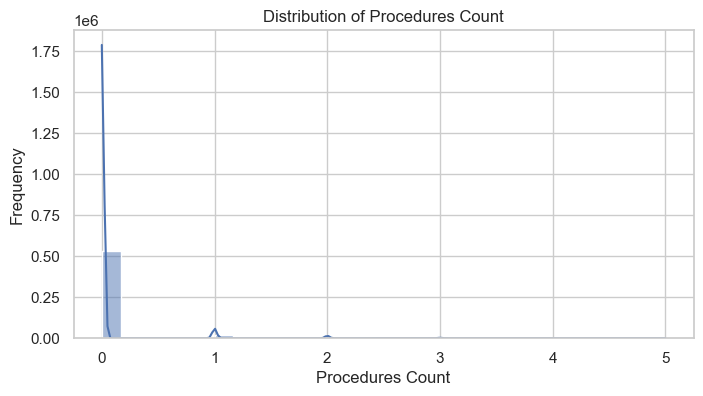

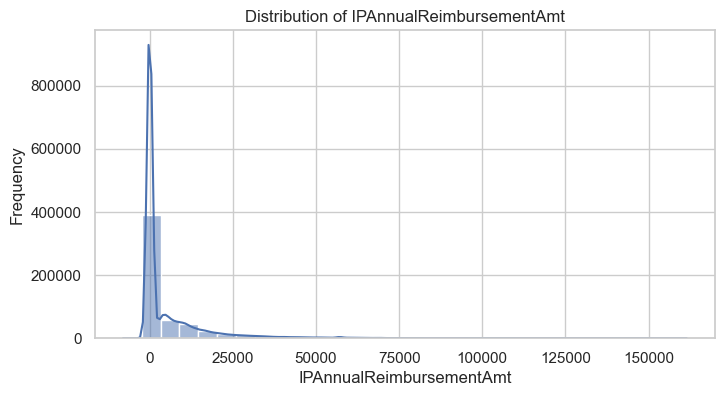

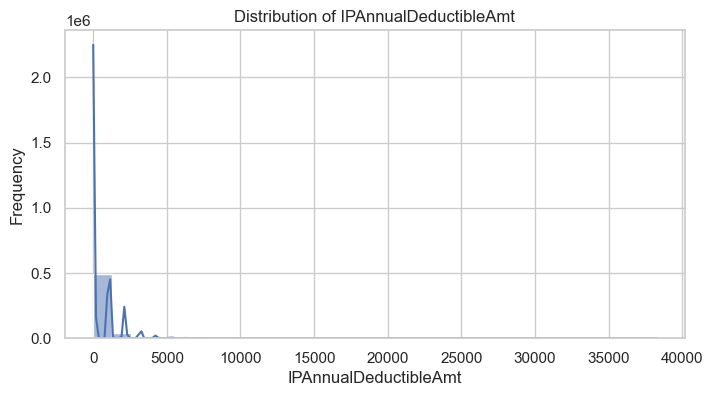

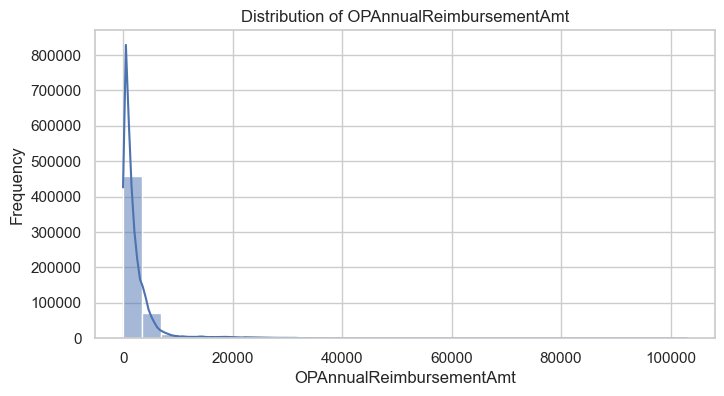

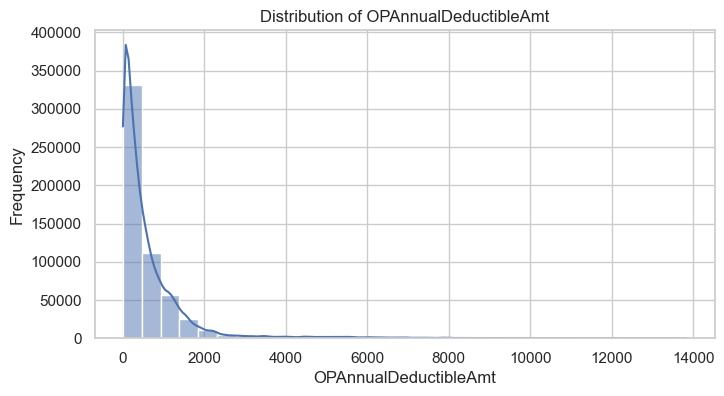

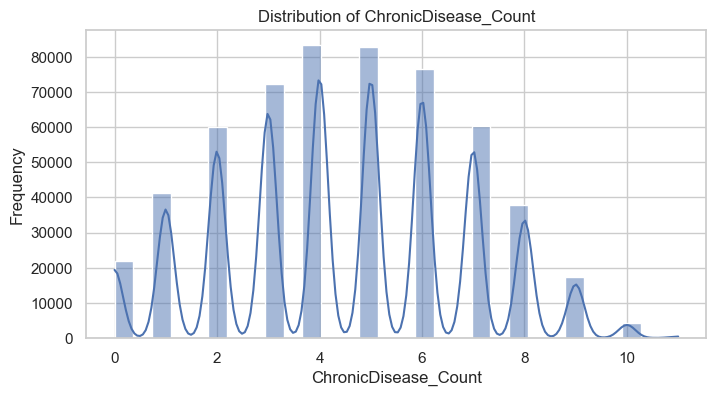

In [112]:
numerical_cols = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'Age', 
                  'TimeInHptal', 'Diagnosis Count', 'Procedures Count',
                  'IPAnnualReimbursementAmt', 'IPAnnualDeductibleAmt',
                  'OPAnnualReimbursementAmt', 'OPAnnualDeductibleAmt',
                  'ChronicDisease_Count']

for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

### b. Categorical Features

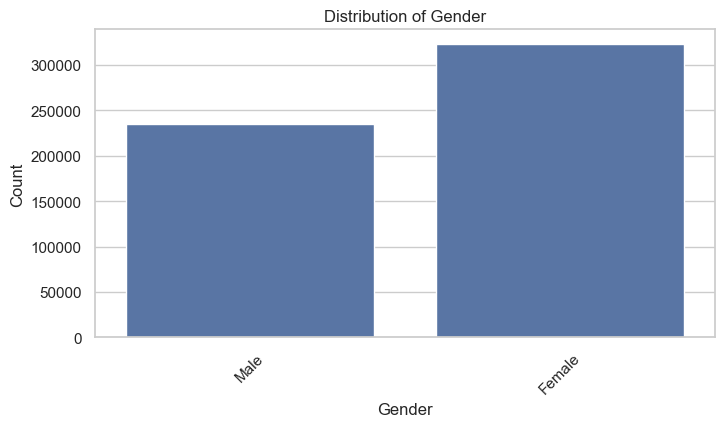

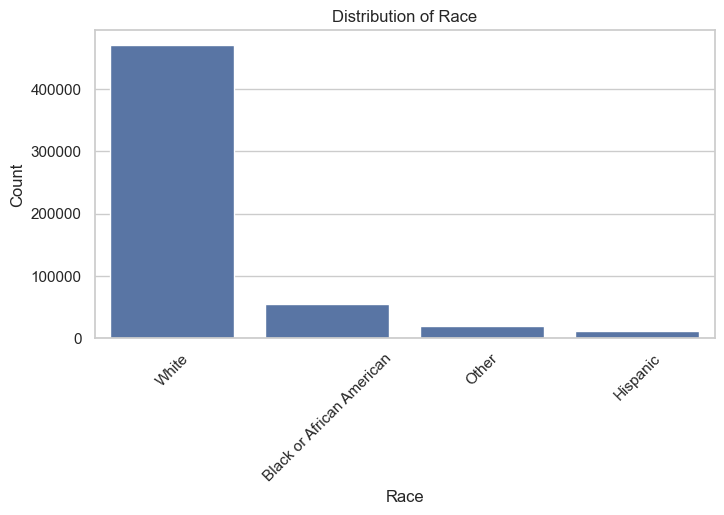

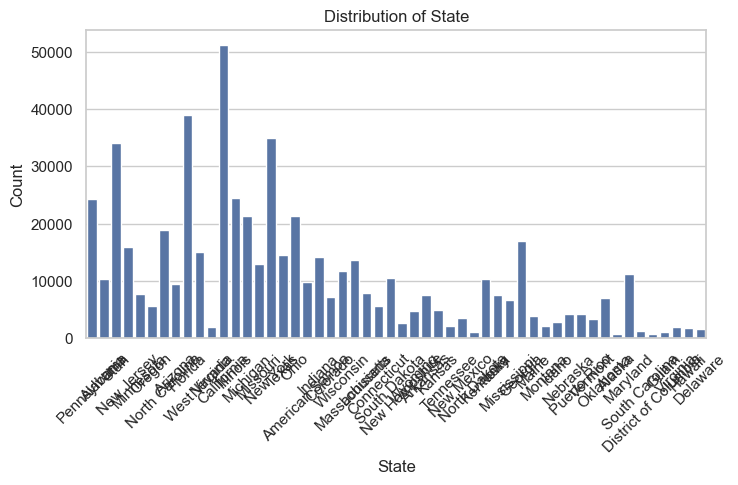

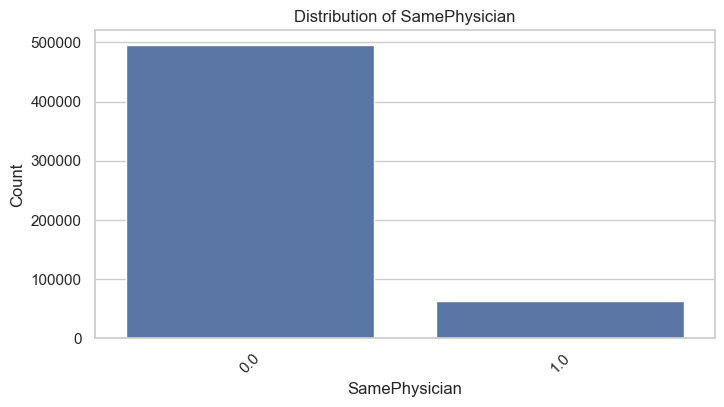

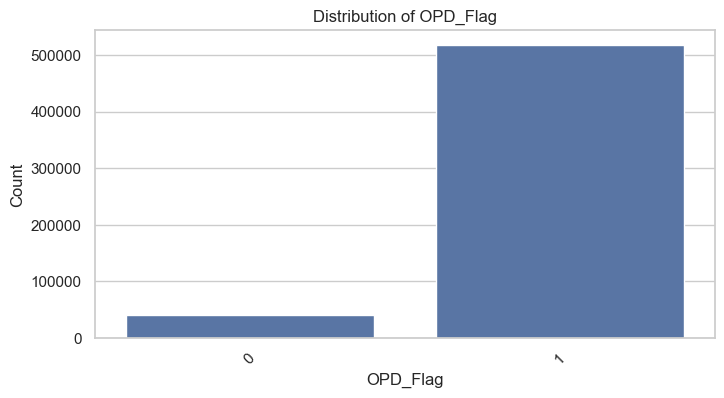

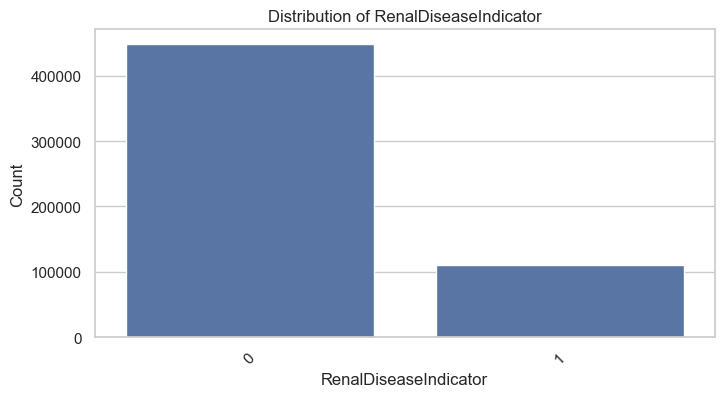

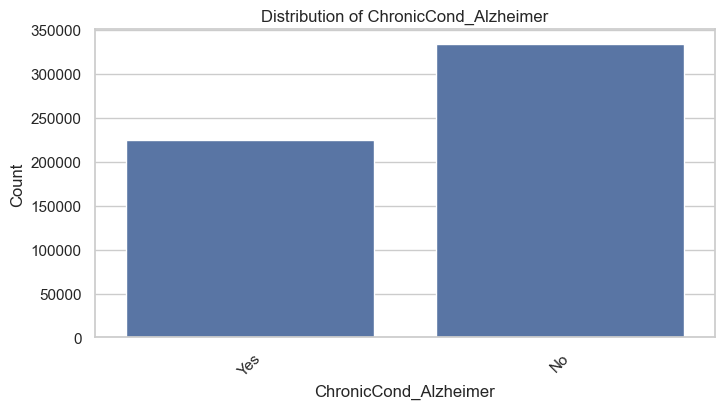

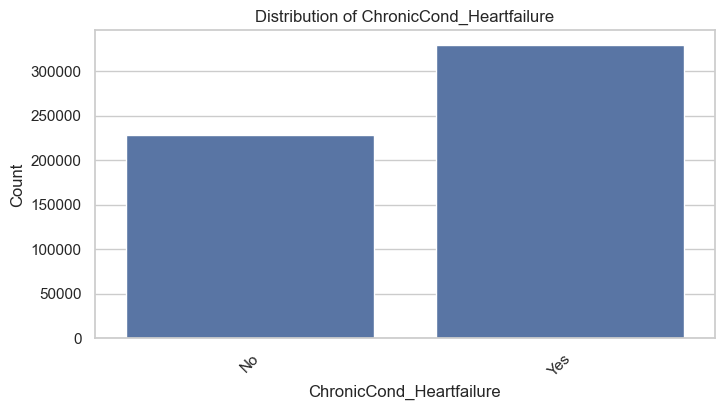

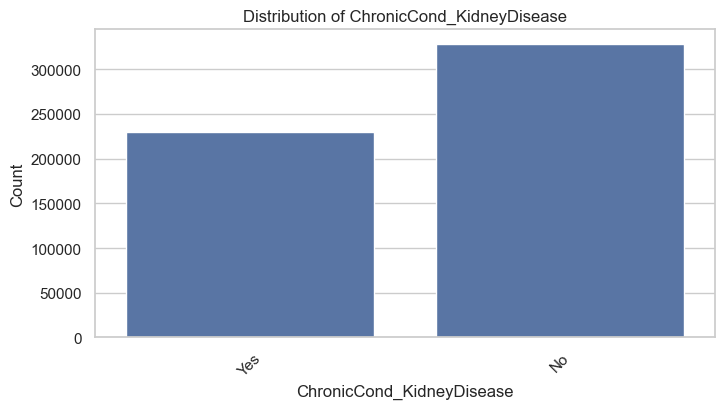

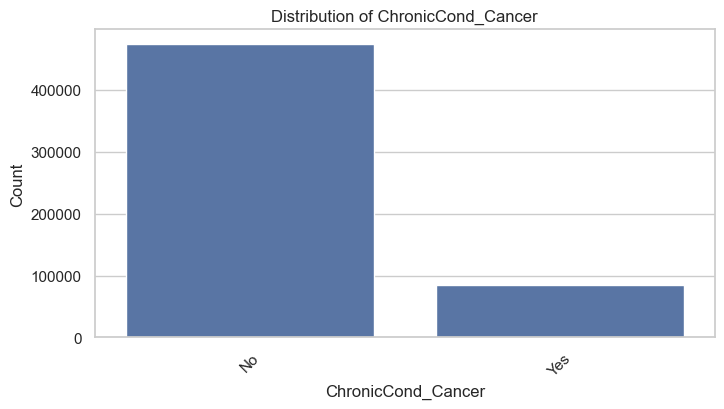

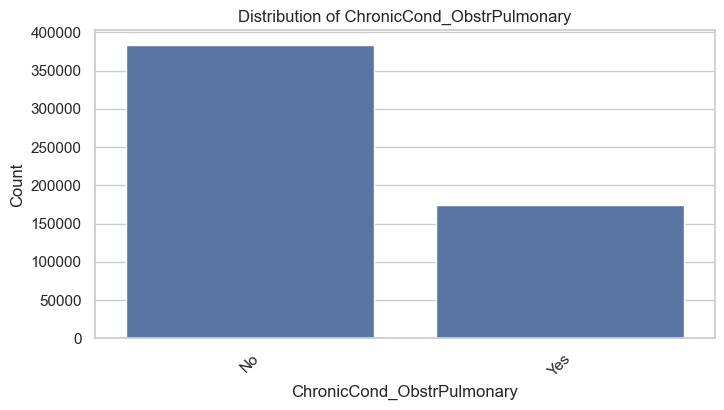

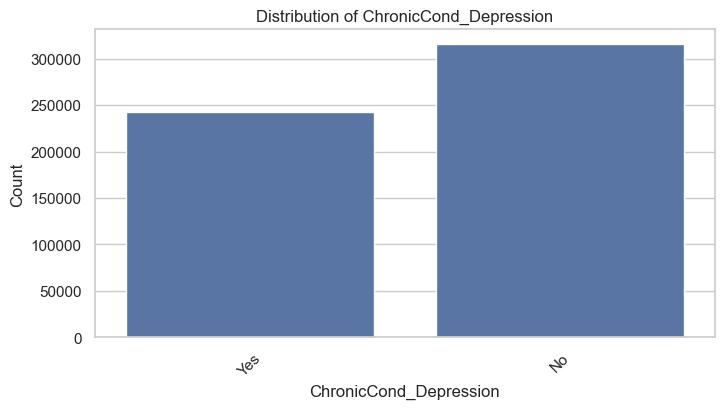

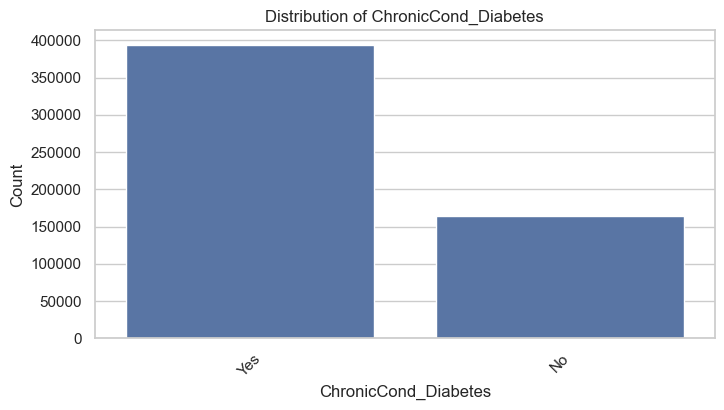

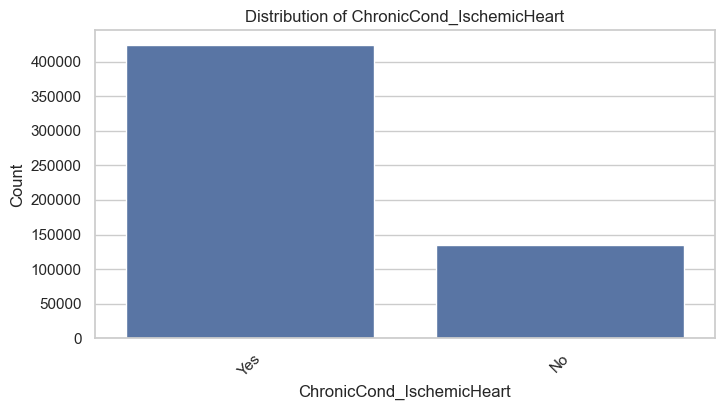

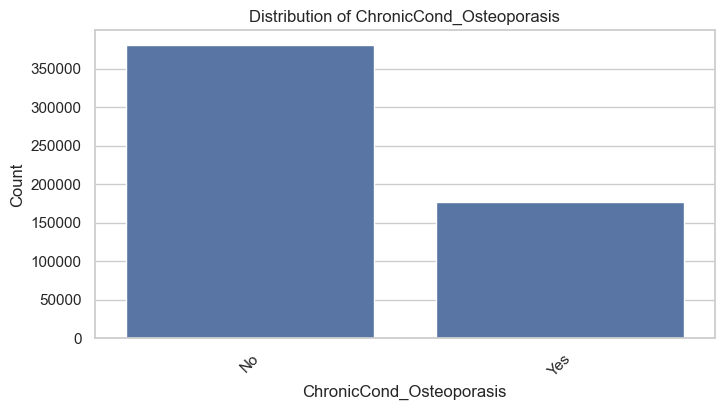

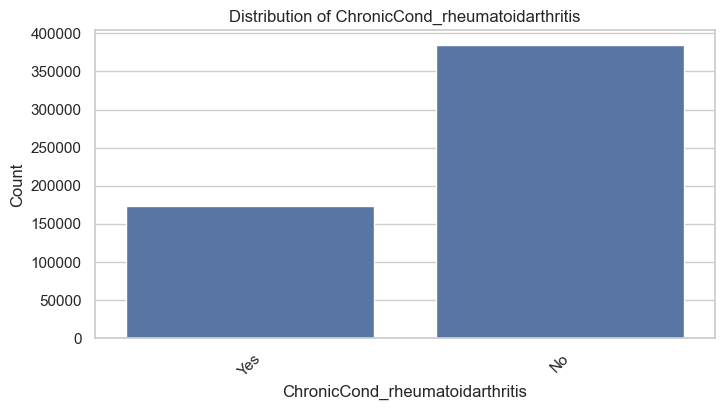

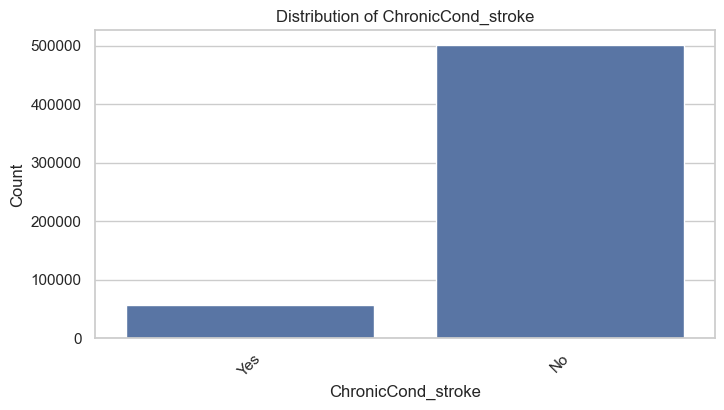

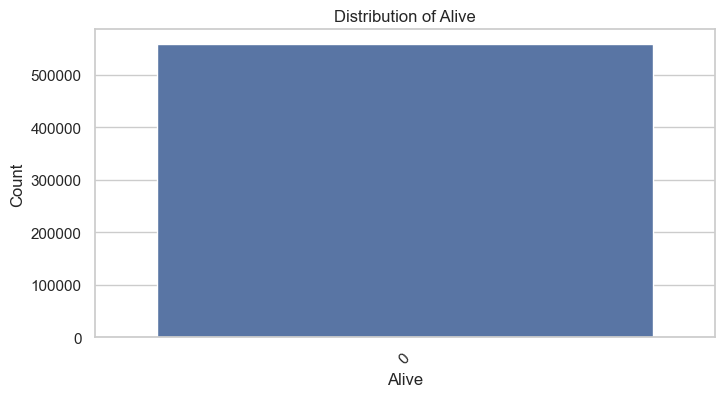

In [113]:
categorical_cols = ['Gender', 'Race', 'State', 'SamePhysician', 
                    'OPD_Flag', 'RenalDiseaseIndicator', 
                    'ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
                    'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
                    'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
                    'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
                    'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
                    'ChronicCond_stroke', 'Alive']

for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

## Bivariate Analysis

#### a. Numerical Features vs. PotentialFraud

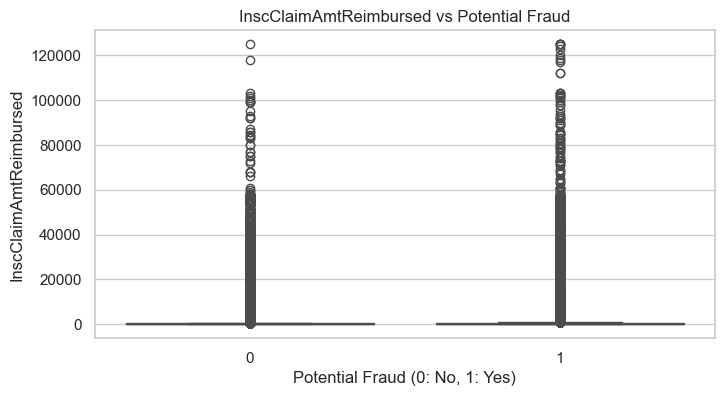

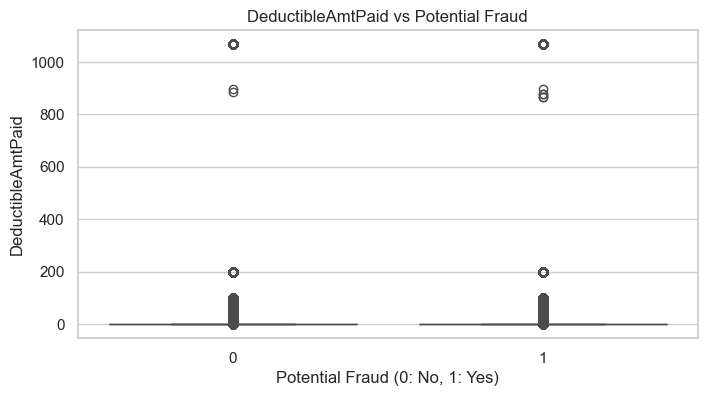

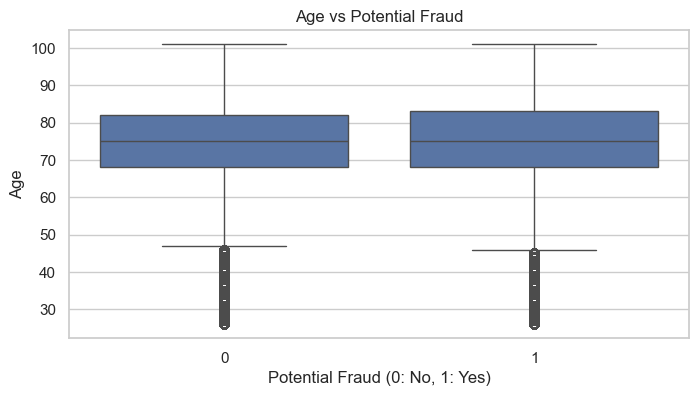

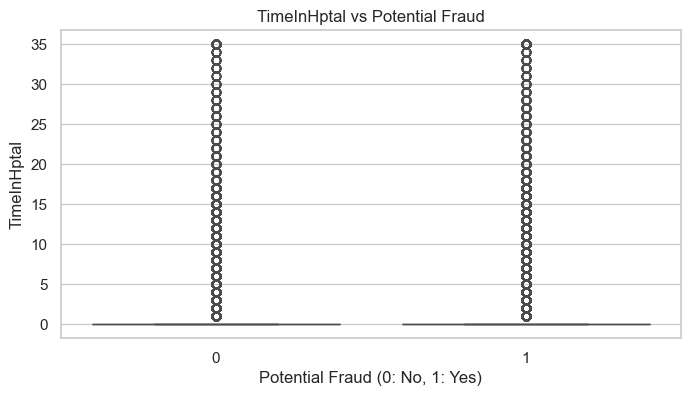

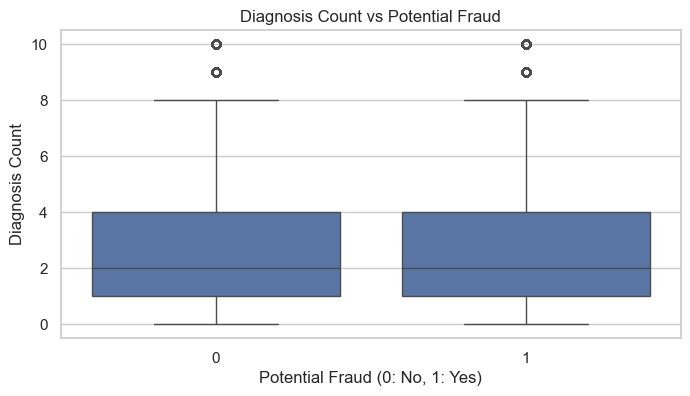

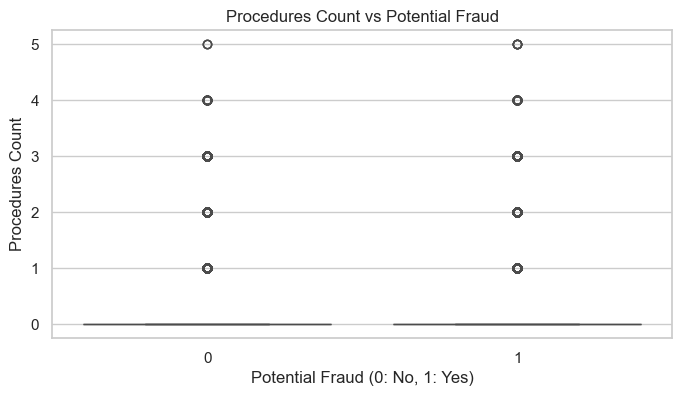

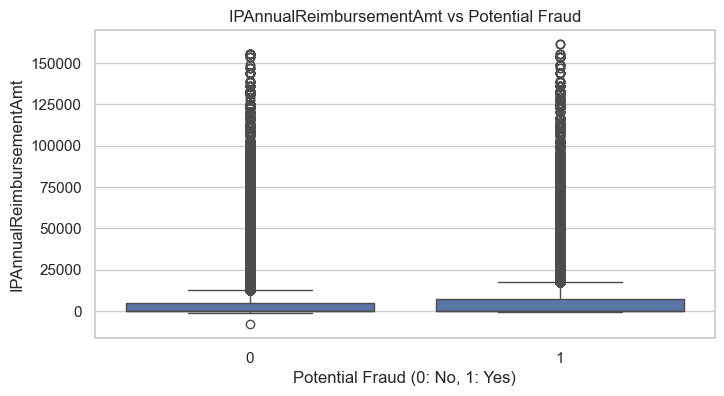

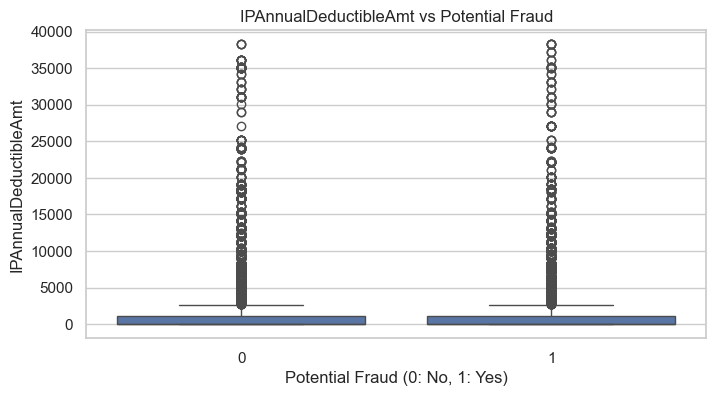

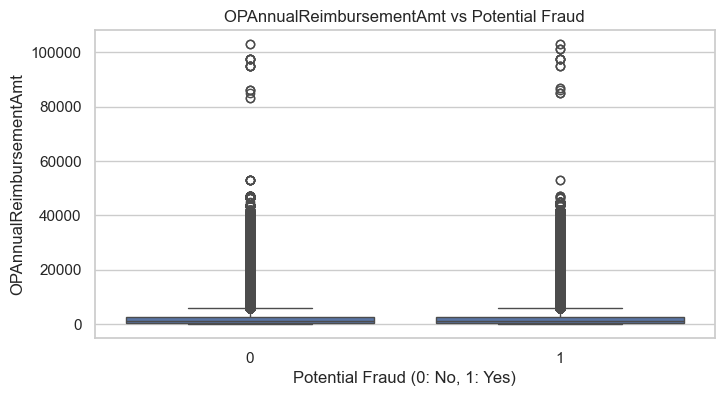

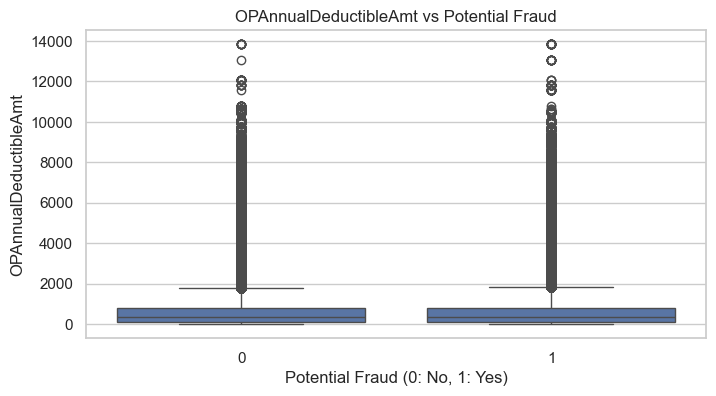

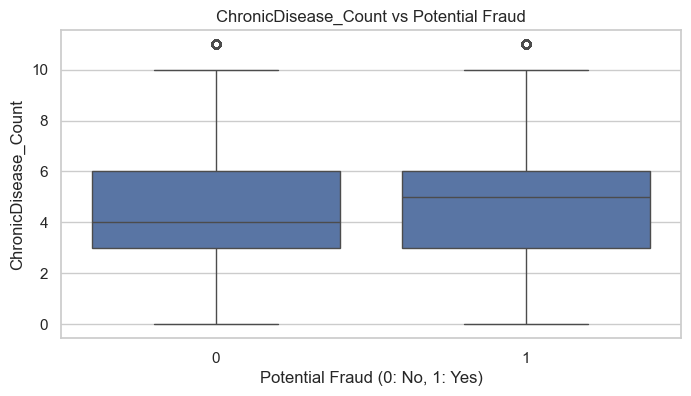

In [114]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='PotentialFraud', y=col, data=df)
    plt.title(f'{col} vs Potential Fraud')
    plt.xlabel('Potential Fraud (0: No, 1: Yes)')
    plt.ylabel(col)
    plt.show()

### b. Categorical Features vs. PotentialFraud

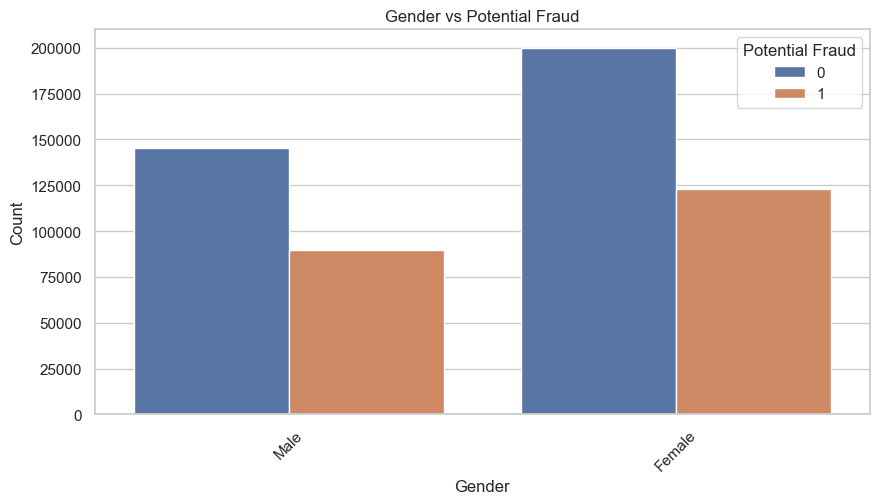

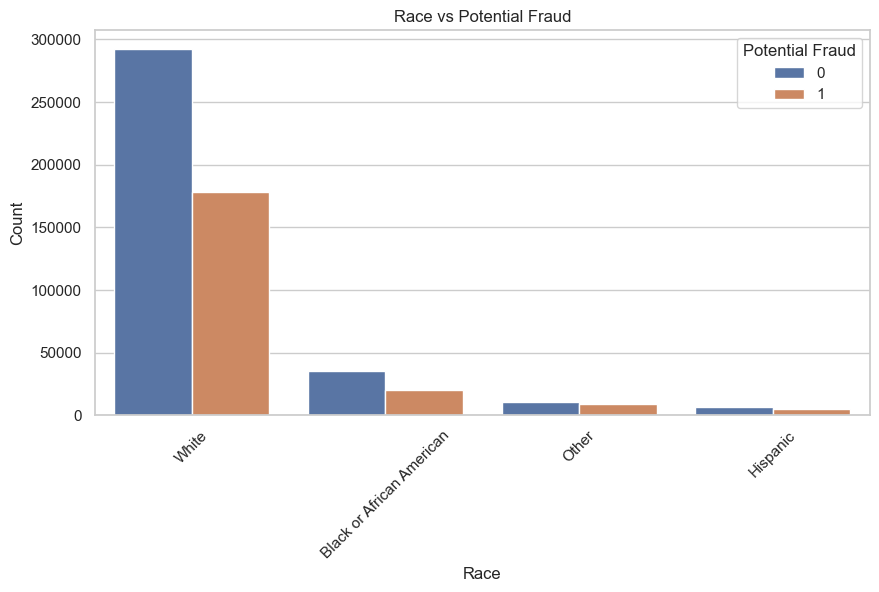

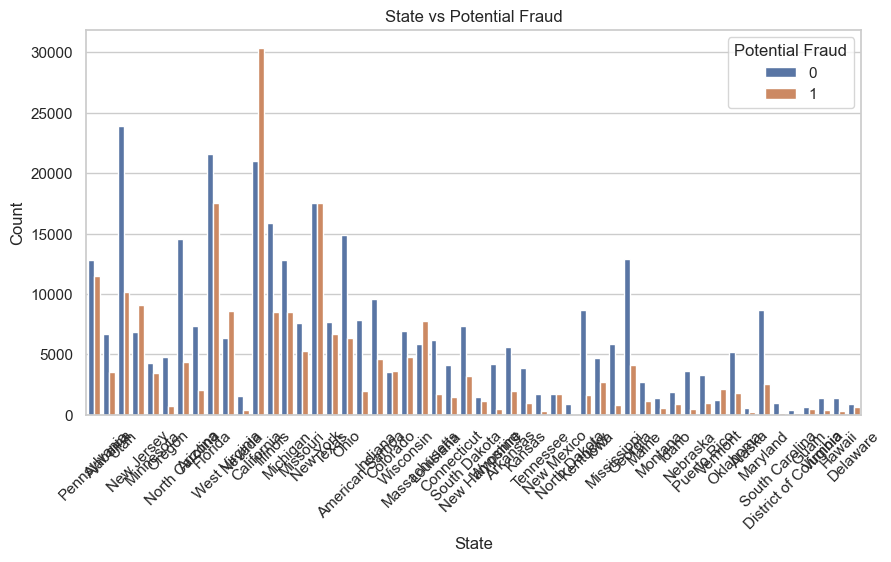

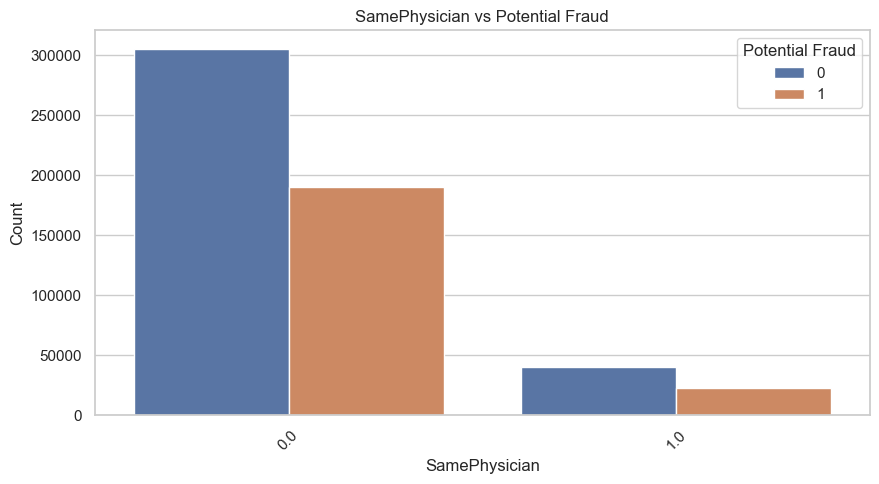

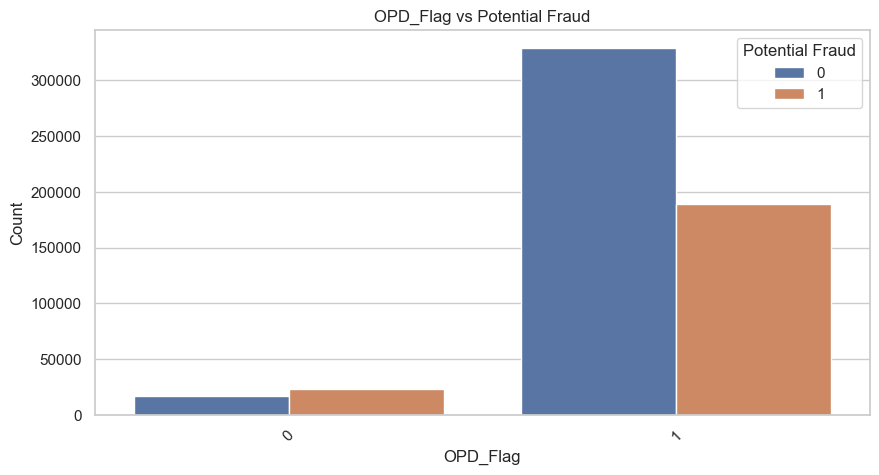

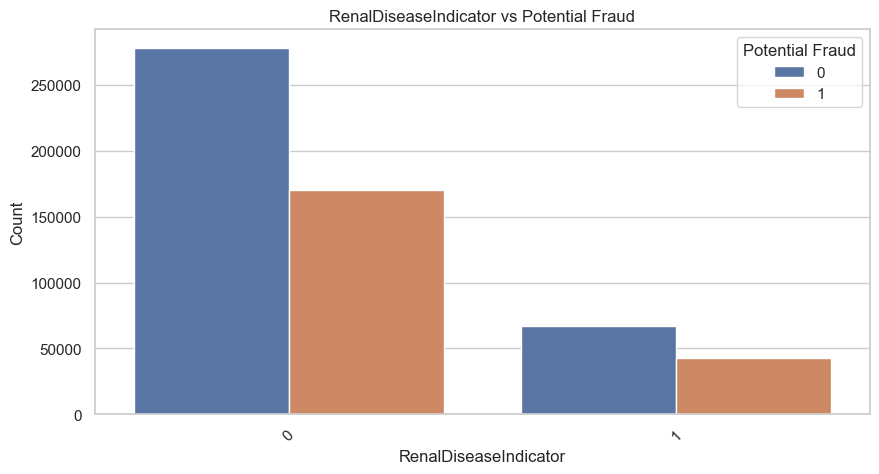

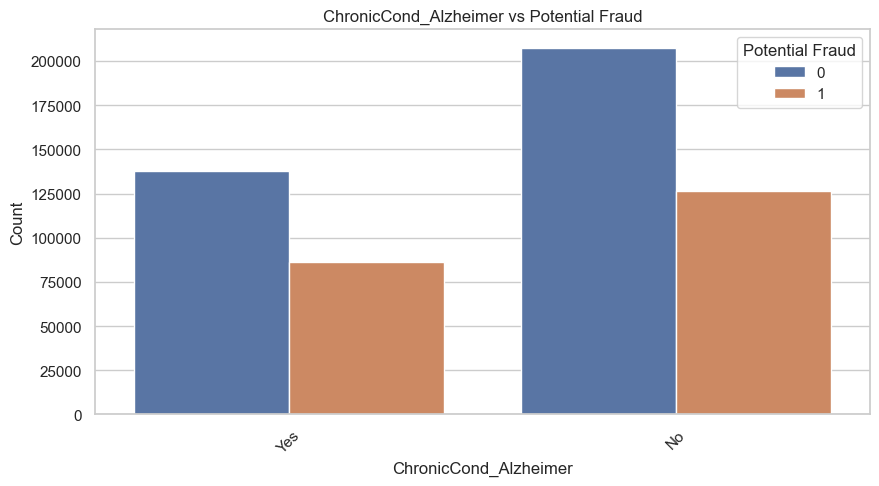

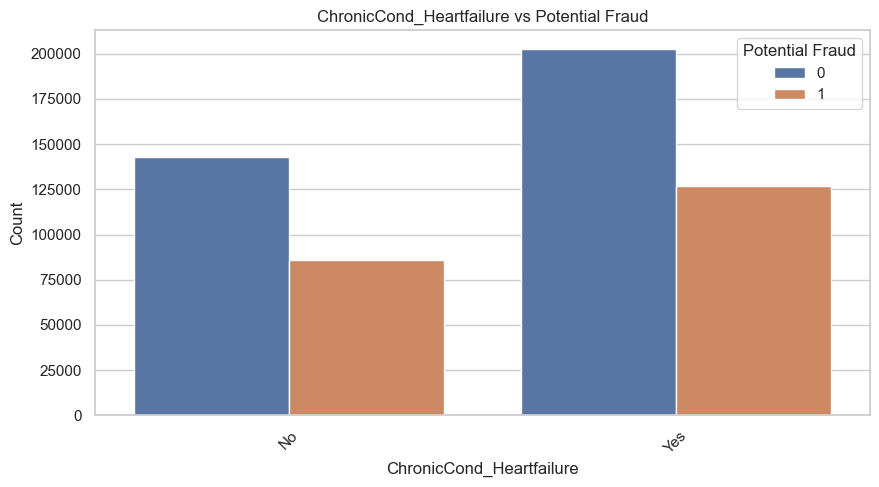

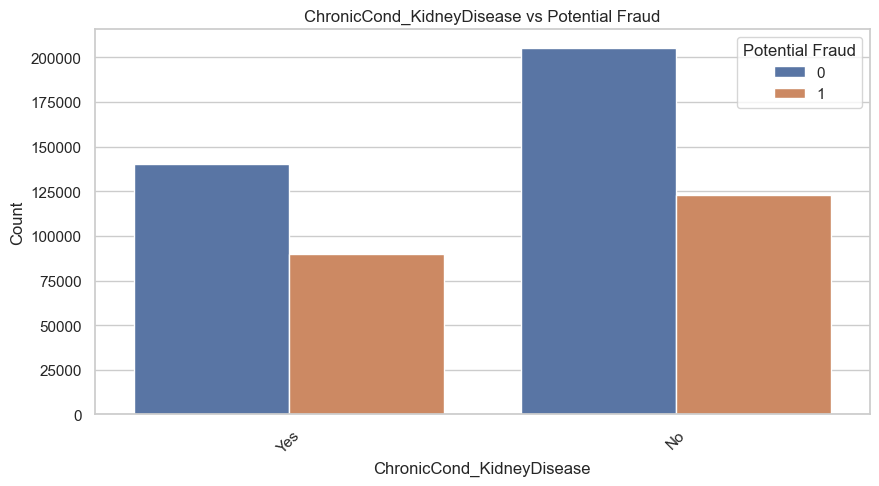

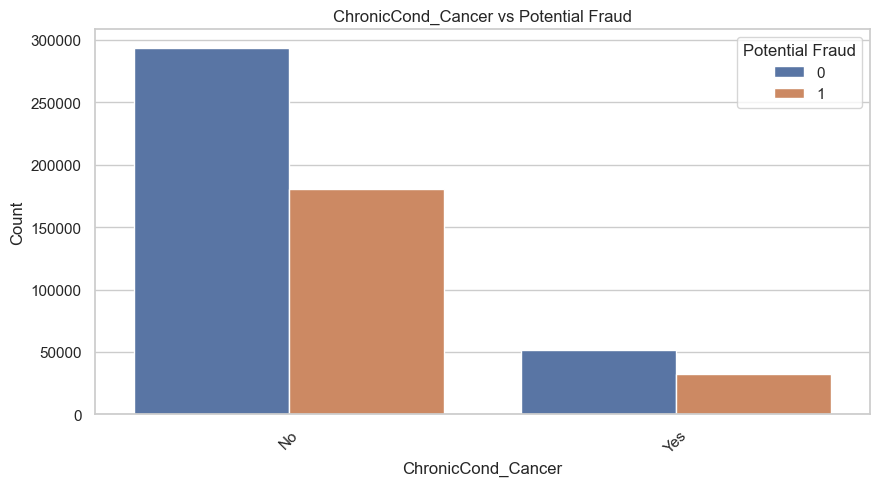

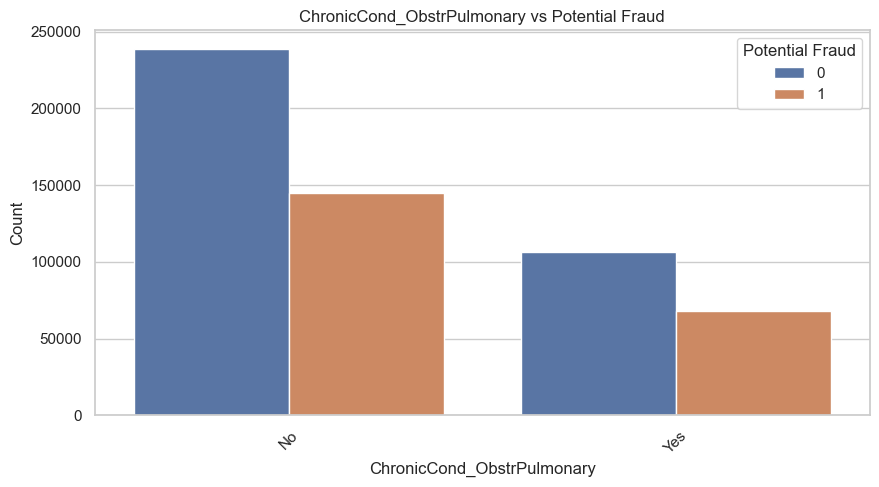

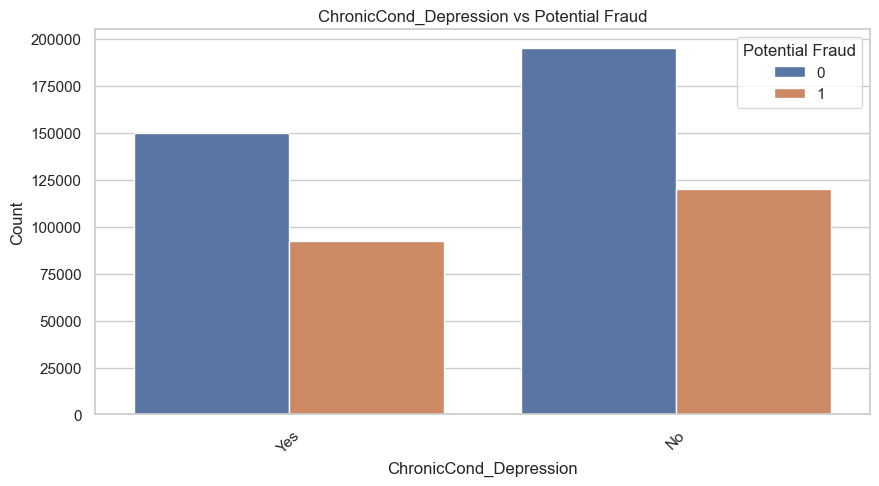

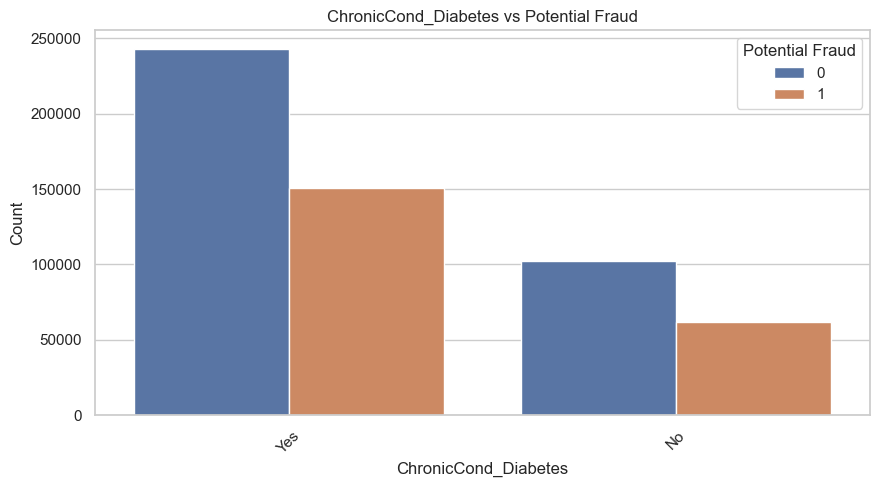

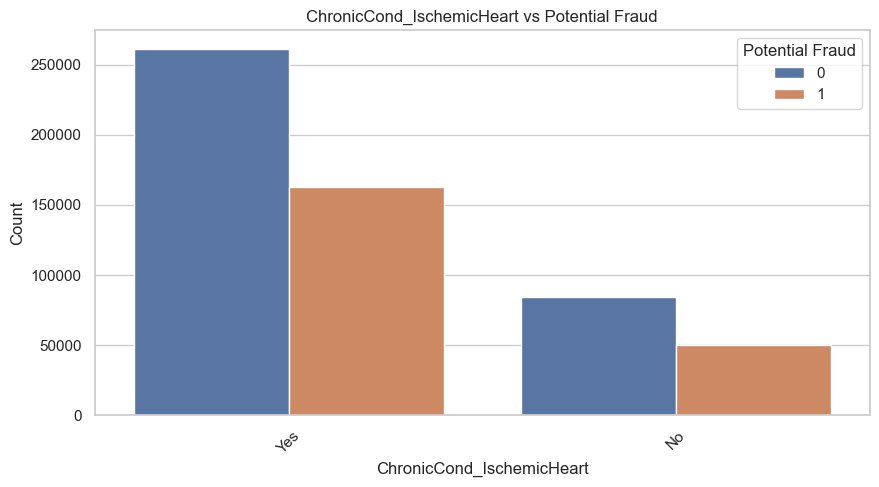

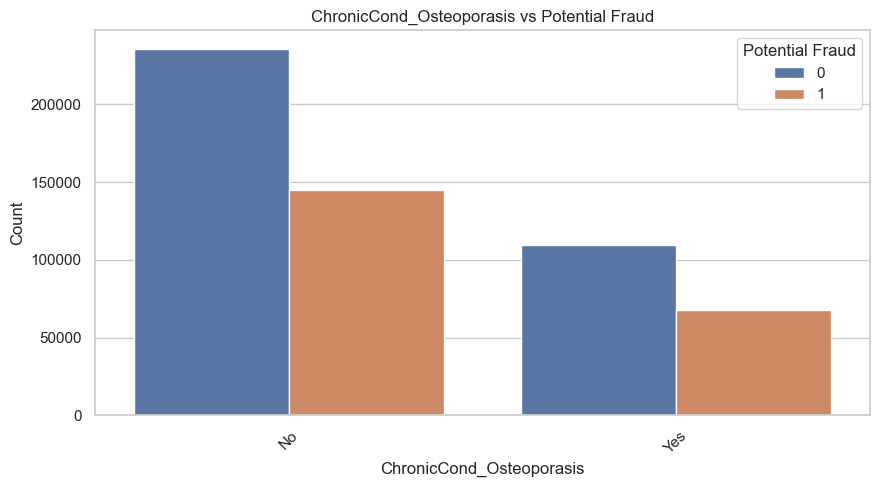

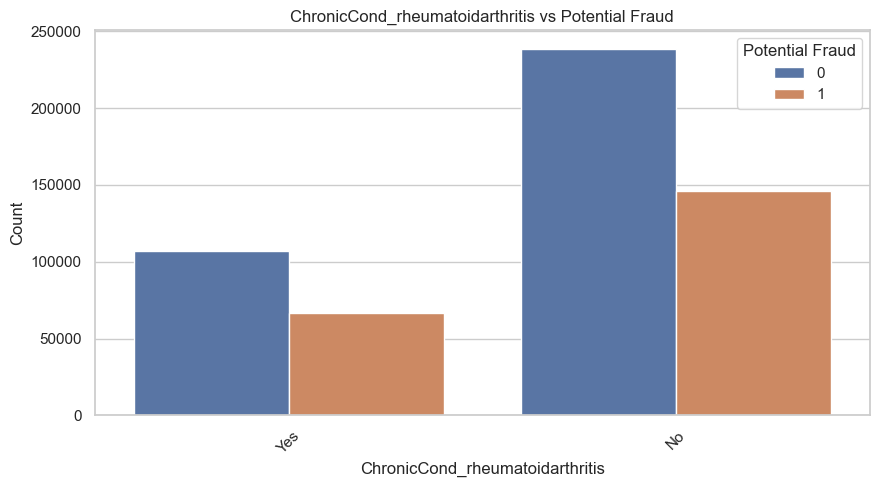

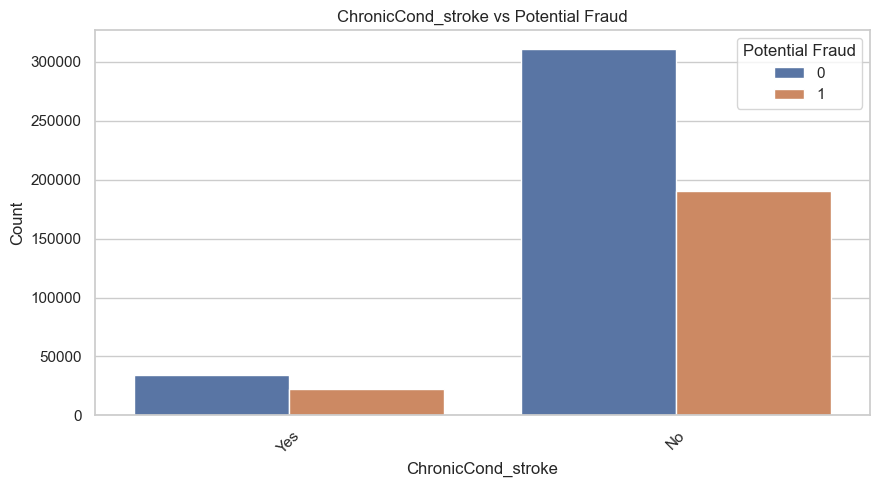

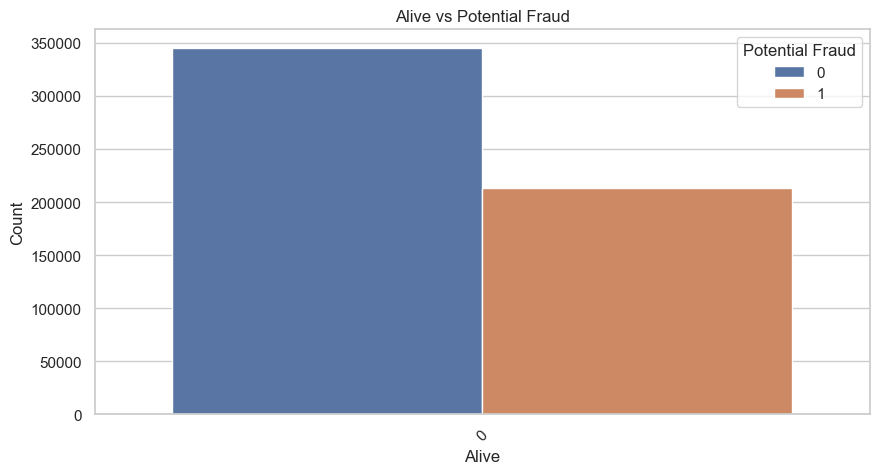

In [115]:
for col in categorical_cols:
    plt.figure(figsize=(10,5))
    sns.countplot(x=col, hue='PotentialFraud', data=df)
    plt.title(f'{col} vs Potential Fraud')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.legend(title='Potential Fraud')
    plt.show()

### c. Correlation Heatmap

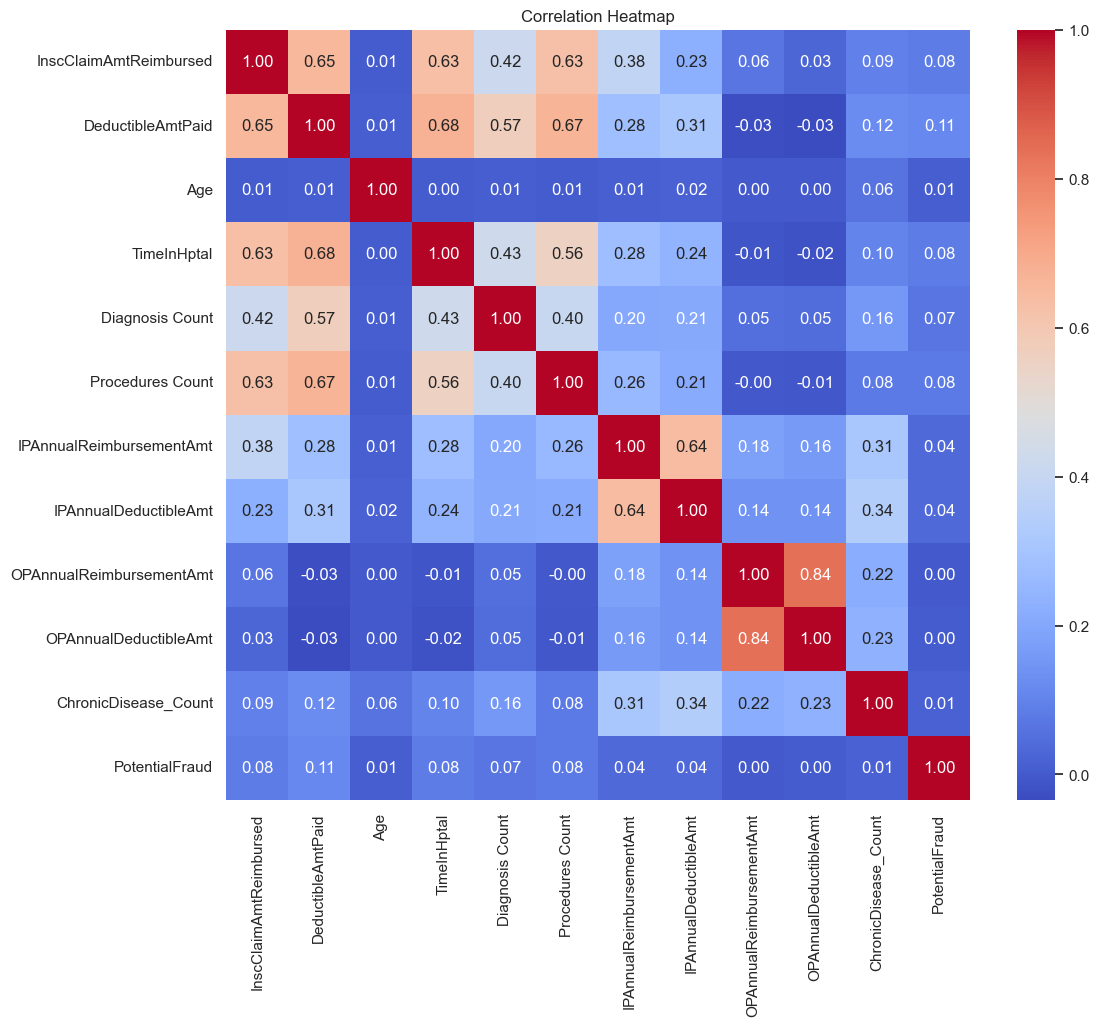

In [116]:
plt.figure(figsize=(12,10))
corr = df[numerical_cols + ['PotentialFraud']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

## Handling Missing Values and Outliers


### a. Outliers

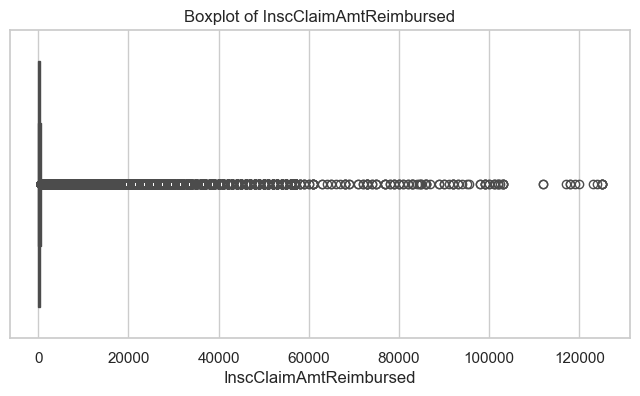

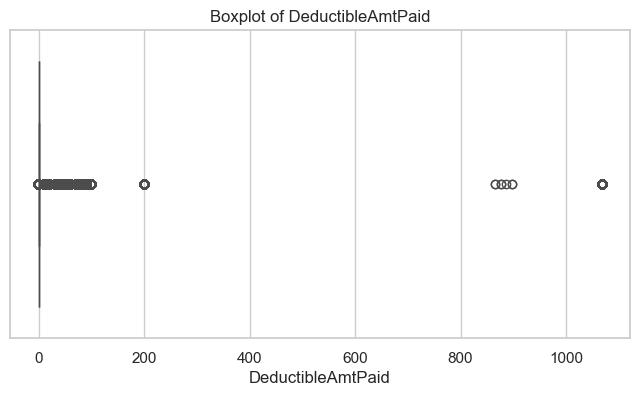

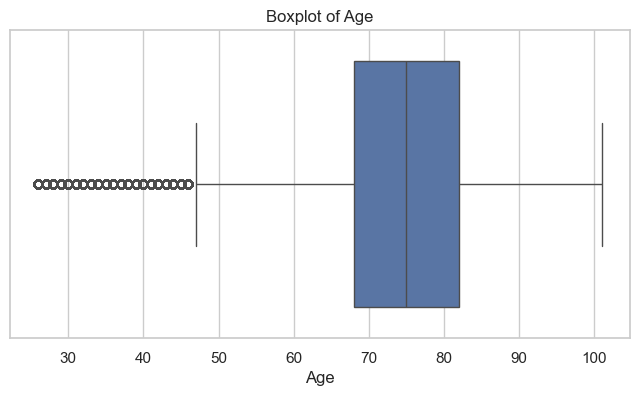

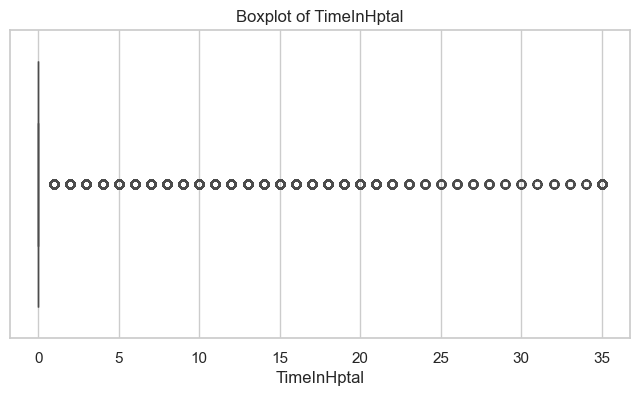

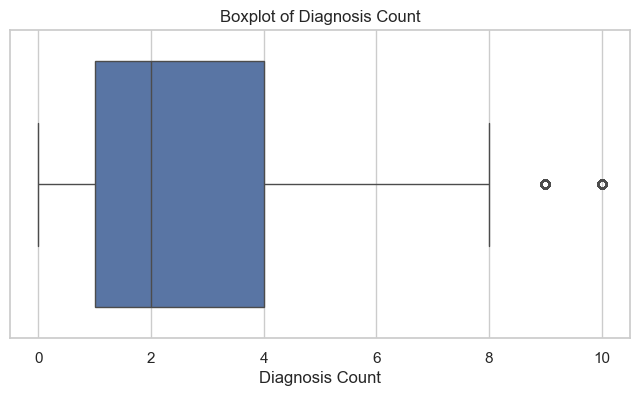

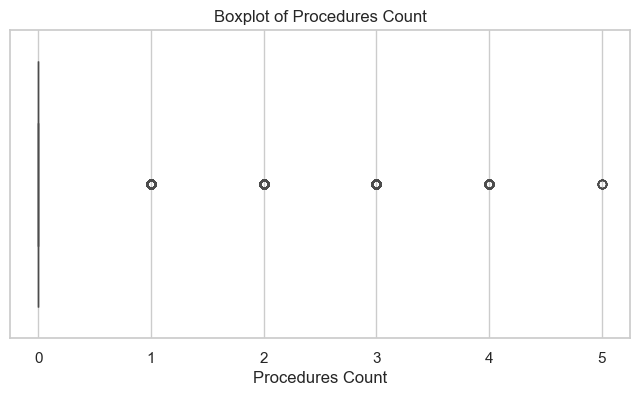

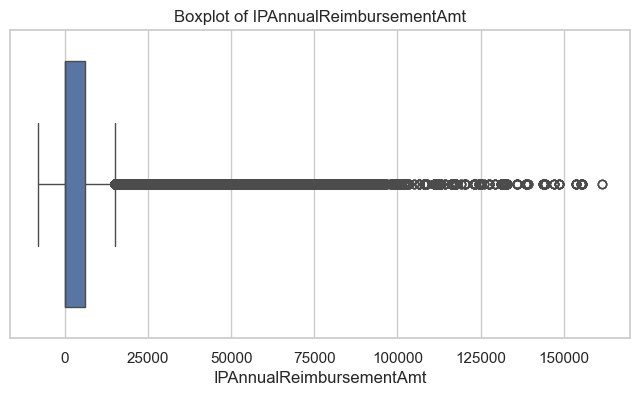

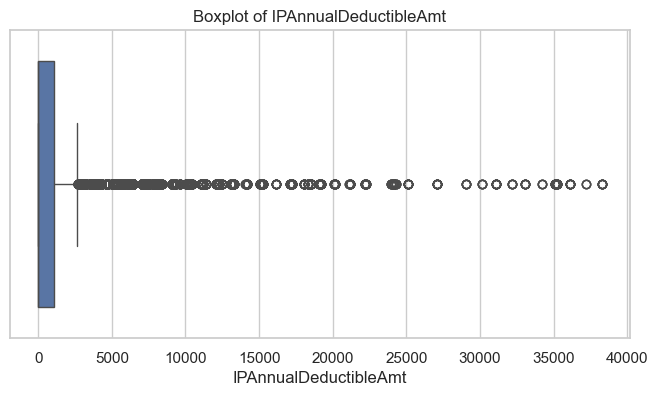

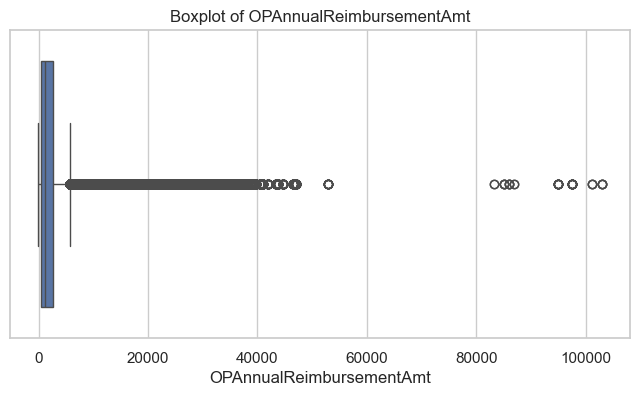

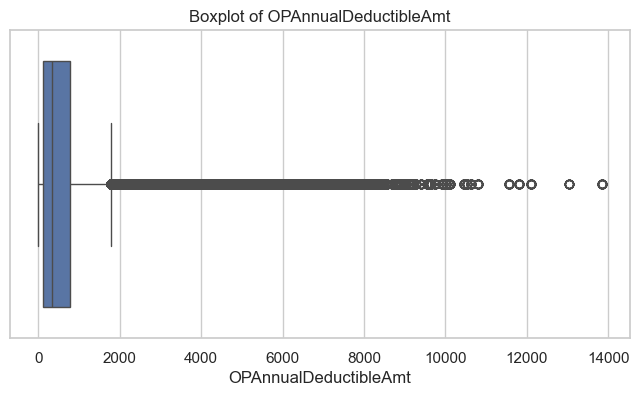

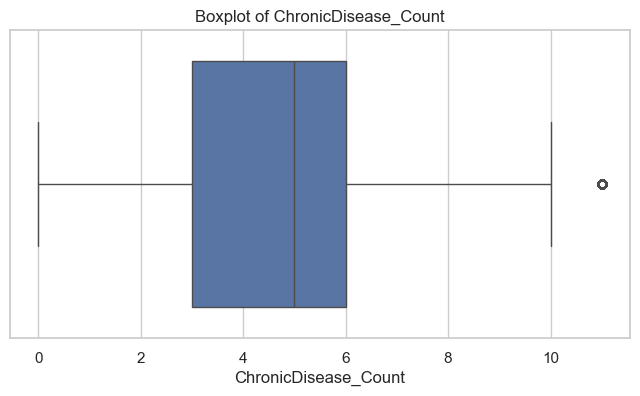

In [118]:
for col in numerical_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.show()

##  Feature Engineering

### a. Age Categories

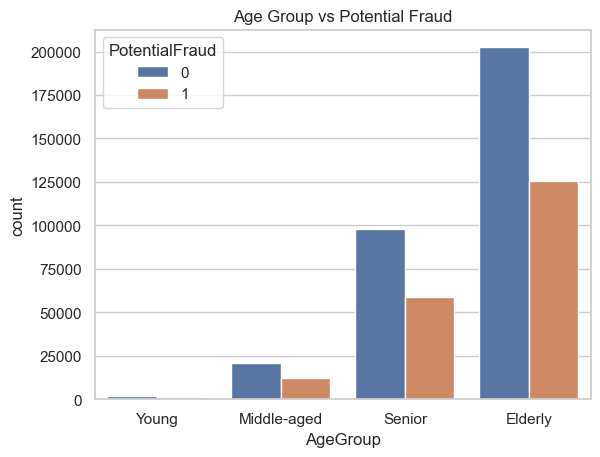

In [119]:
# Create age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 30, 50, 70, 90], labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
sns.countplot(x='AgeGroup', hue='PotentialFraud', data=df)
plt.title('Age Group vs Potential Fraud')
plt.show()

### b. Chronic Conditions

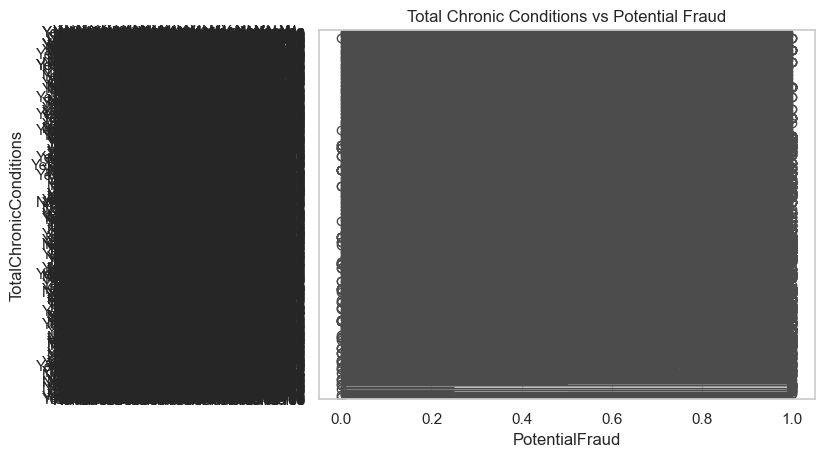

In [120]:
chronic_cols = ['ChronicCond_Alzheimer', 'ChronicCond_Heartfailure',
               'ChronicCond_KidneyDisease', 'ChronicCond_Cancer',
               'ChronicCond_ObstrPulmonary', 'ChronicCond_Depression',
               'ChronicCond_Diabetes', 'ChronicCond_IschemicHeart',
               'ChronicCond_Osteoporasis', 'ChronicCond_rheumatoidarthritis',
               'ChronicCond_stroke']

df['TotalChronicConditions'] = df[chronic_cols].apply(lambda x: x.sum(), axis=1)
sns.boxplot(x='PotentialFraud', y='TotalChronicConditions', data=df)
plt.title('Total Chronic Conditions vs Potential Fraud')
plt.show()

### c. Time-Based Features

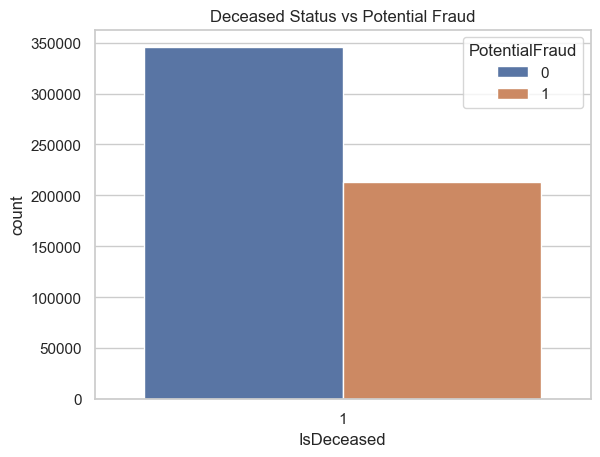

In [121]:
# Convert dates to datetime
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['DOD'] = pd.to_datetime(df['DOD'], errors='coerce')

# Calculate age if not already present
df['CalculatedAge'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365

# Survival status based on DOD
df['IsDeceased'] = df['DOD'].notnull().astype(int)
sns.countplot(x='IsDeceased', hue='PotentialFraud', data=df)
plt.title('Deceased Status vs Potential Fraud')
plt.show()

In [126]:
from scipy.stats import zscore

In [127]:
# Selecting numerical columns
numerical_columns = ['InscClaimAmtReimbursed', 'DeductibleAmtPaid', 'ClaimPeriod', 'TimeInHptal', 'Diagnosis Count', 'Procedures Count', 'IPAnnualReimbursementAmt', 'OPAnnualReimbursementAmt']
 
# Calculate z-scores
z_scores = df.sample(10000, random_state=42)[numerical_columns].apply(zscore)
 
# Set a threshold for considering data points as outliers (e.g., 3 standard deviations)
outliers = z_scores[(z_scores > 3) | (z_scores < -3)]
 
print("Number of Outliers Detected:")
print(outliers.notnull().sum())

Number of Outliers Detected:
InscClaimAmtReimbursed      178
DeductibleAmtPaid           711
ClaimPeriod                 496
TimeInHptal                 211
Diagnosis Count               0
Procedures Count            431
IPAnnualReimbursementAmt    244
OPAnnualReimbursementAmt    236
dtype: int64
